# Análisis predictivo de series temporales

-----

## Modelos autorregresivos y autocorrelación parcial

### Introducción:

* En las clases anteriores introdujimos los conceptos de autocorrelación y correlación cruzada para analizar la relación entre una serie o series y sus versiones "laggeadas".

* Exploramos además cómo realizar regresiones lineales (con o sin lags) para explicar el comportamiento de una serie. Sirve para explicar tendencias, estacionalidad.

* Generalmente esto es *insuficiente* para explicar el comportamiento de una serie con dinámica interna.

* En general esto lo vimos como que "quedaba correlación" luego de los ajustes.

### Objetivos:

* Introducir la correlación como parte intrínseca de la serie. Hacer que los valores anteriores del proceso influyan directamente en el valor observado actual (autorregresivo, AR), y que valores anteriores del ruido influyan en el valor actual observado (media móvil, MA).

* Combinaciones de los dos anteriores da lugar a los modelos ARMA.

* Veremos cómo es posible:

  * Usar modelos ARMA para predecir valores futuros de una serie.
  * Ajustar los parámetros de un modelo ARMA a partir de observaciones.
  
* Si agregamos el caso no estacionario, veremos como *diferenciar* una serie puede producir estacionariedad. Esto da lugar a los modelos ARIMA (I=integrated).

### Definición:

Una *serie temporal* es una sucesión de variables aleatorias o *proceso estocástico* $x_0,x_1,x_2,\ldots$. La variable aleatoria $x_t$ denota el valor del proceso al tiempo $t$.

* Al proceso estocástico o serie temporal se lo denota por $\{x_t\}$.

* Típicamente (y para todo este curso) se consideran indexados por $t$ entero ($\ldots, -2, -1, 0, 1, 2, \ldots$).

* A los valores particulares que toma una serie temporal cuando la observamos se le denomina *realización* del proceso, y lo denotaremos por $x_t$, abusando un poco de la notación.

### Ruido blanco

__Definición:__ El caso más sencillo de serie temporal es un conjunto de variables aleatorias con la misma distribución y no correlacionadas. Si ${w_t}$ es una serie temporal en la cual las variables tienen media $E[w_t]=0$, varianza $Var(w_t) = \sigma_w^2 >0$ y la covarianza de $w_t$ y $w_s$ es $0$ se le denomina *ruido blanco*.  

__Definición:__ Si además las variables son independientes y con la misma distribución (iid), se le denomina ruido blanco independiente.

__Definición:__ En el caso que además la distribución de $w_t$ para cada $t$ sea Normal $N(0,\sigma_w^2)$ le llamamos *ruido blanco gaussianp*

In [38]:
install.packages("devtools")     # only need to do this once
devtools::install_github("nickpoison/astsa")
#install.packages("astsa")
library(astsa)
options(repr.plot.width=12, repr.plot.height=7) #ajusta tamaño de graficas


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Skipping install of 'astsa' from a github remote, the SHA1 (7ef0cad9) has not changed since last install.
  Use `force = TRUE` to force installation



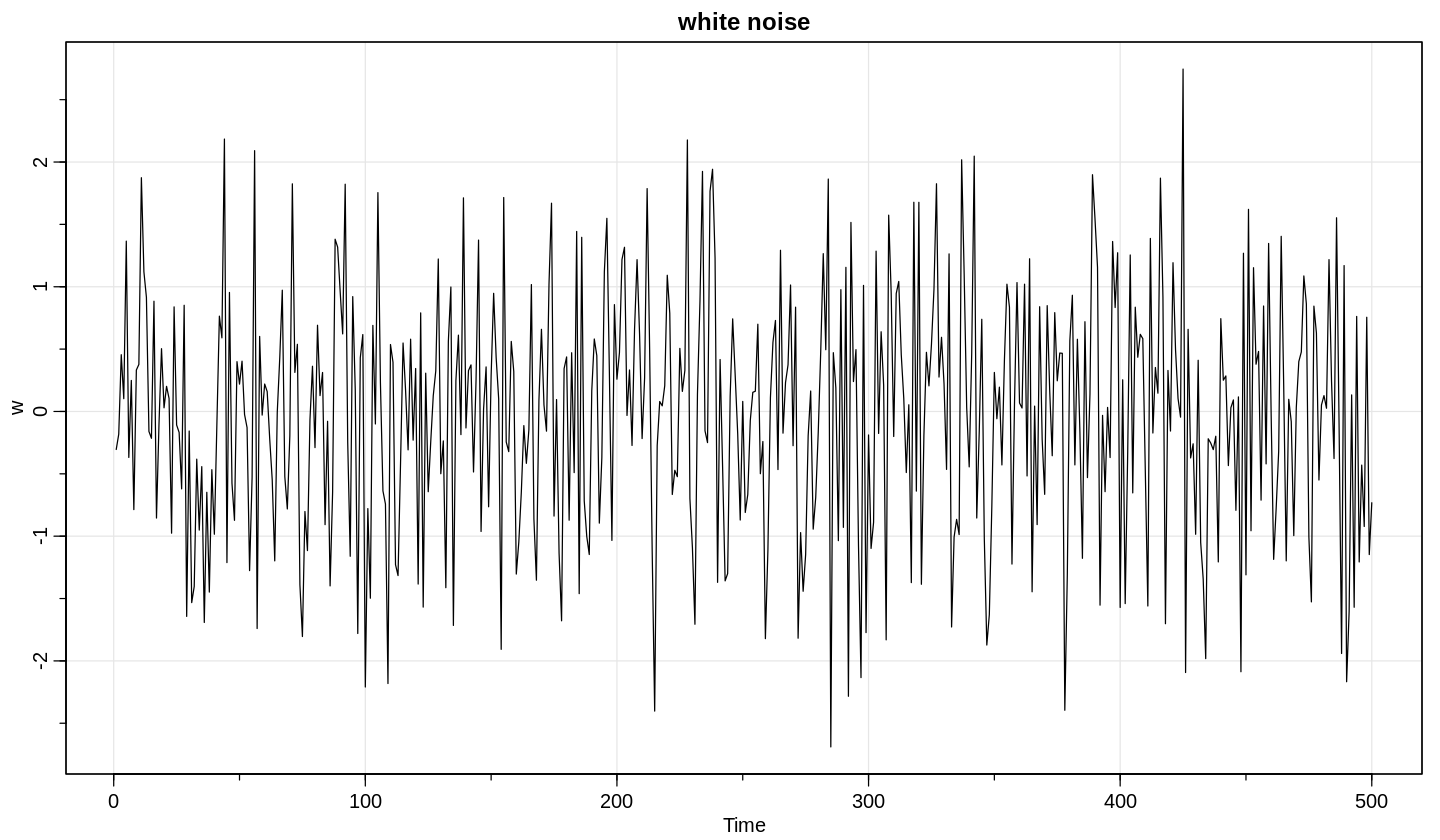

In [39]:
w = rnorm(500,0,1)  # 500 N(0,1) variates
tsplot(w, main="white noise")

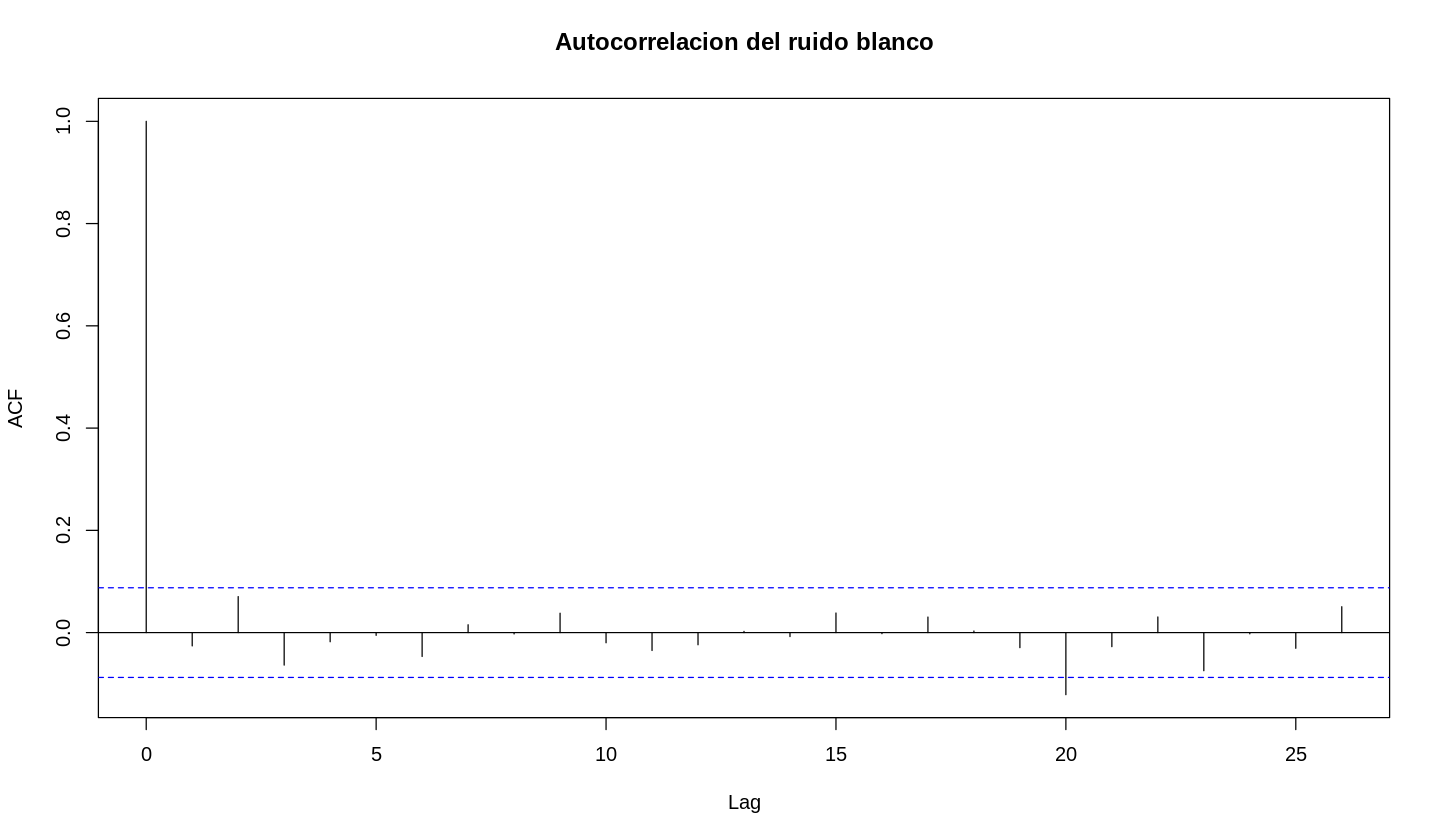

In [40]:
acf(w, main="Autocorrelacion del ruido blanco")

### Modelos autorregresivos

**Idea:** el valor del proceso en tiempo $t$ es una combinación lineal de los últimos $p$ valores de la serie, más una *innovación* o *ruido* que afecta solo al tiempo $t$.

> **Ejemplo:**
>
>Consideremos el proceso:
> $$x_t = x_{t-1} -0.9 x_{t-2} + w_t.$$
>
> Con $x_{0}$ y $x_{-1}$ dados (por ejemplo 0).

Este es un proceso *autorregresivo de orden 2*.

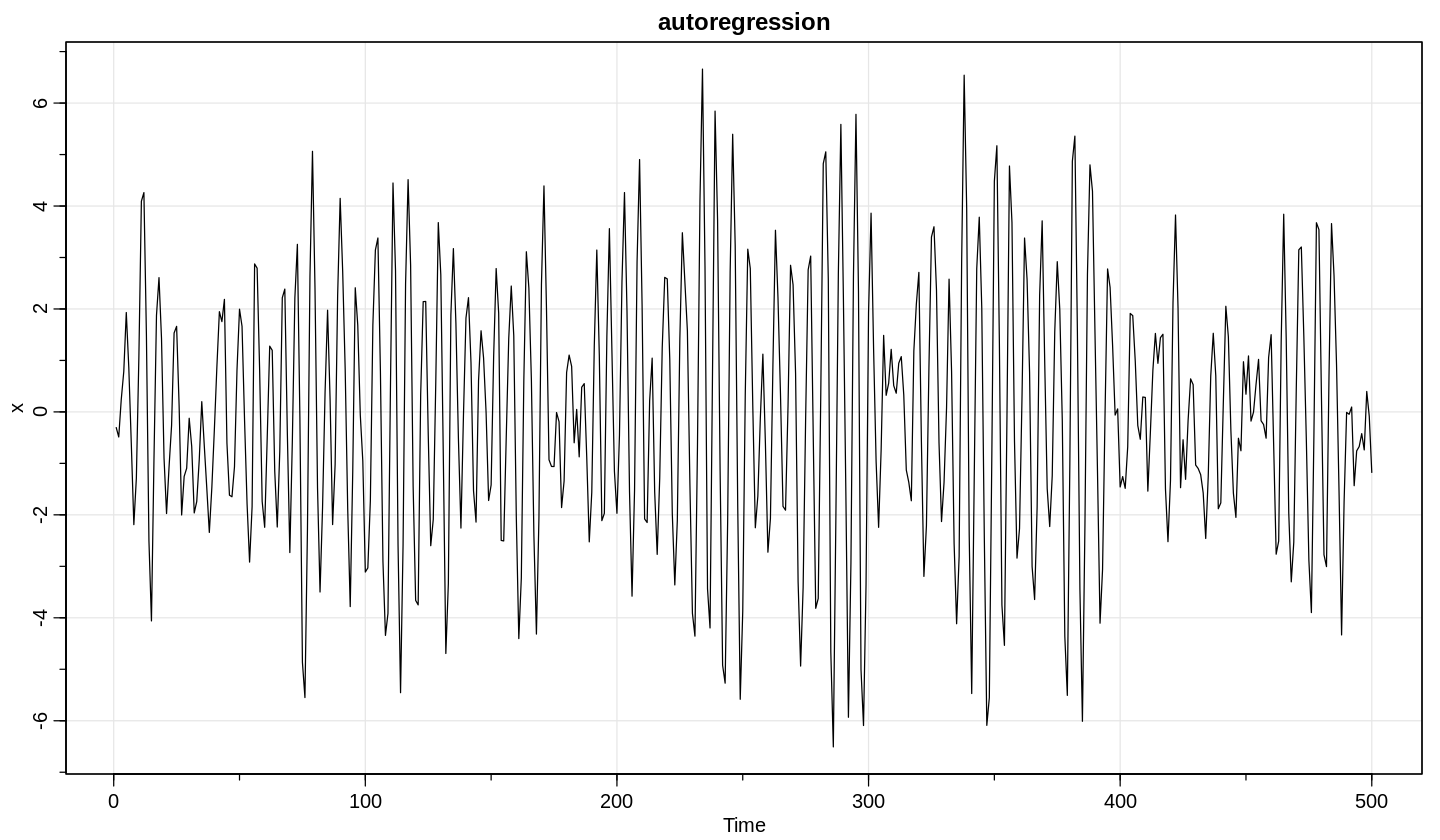

In [41]:
#esto se construye con el comando "filter" de R
x = filter(w, filter=c(1,-.9), method="recursive")
tsplot(x, main="autoregression")

### Autocorrelación del proceso:

Uno tiende a pensar que la autocorrelación del proceso solo tendrá valores significativos para los 2 anteriores. **FALSO**

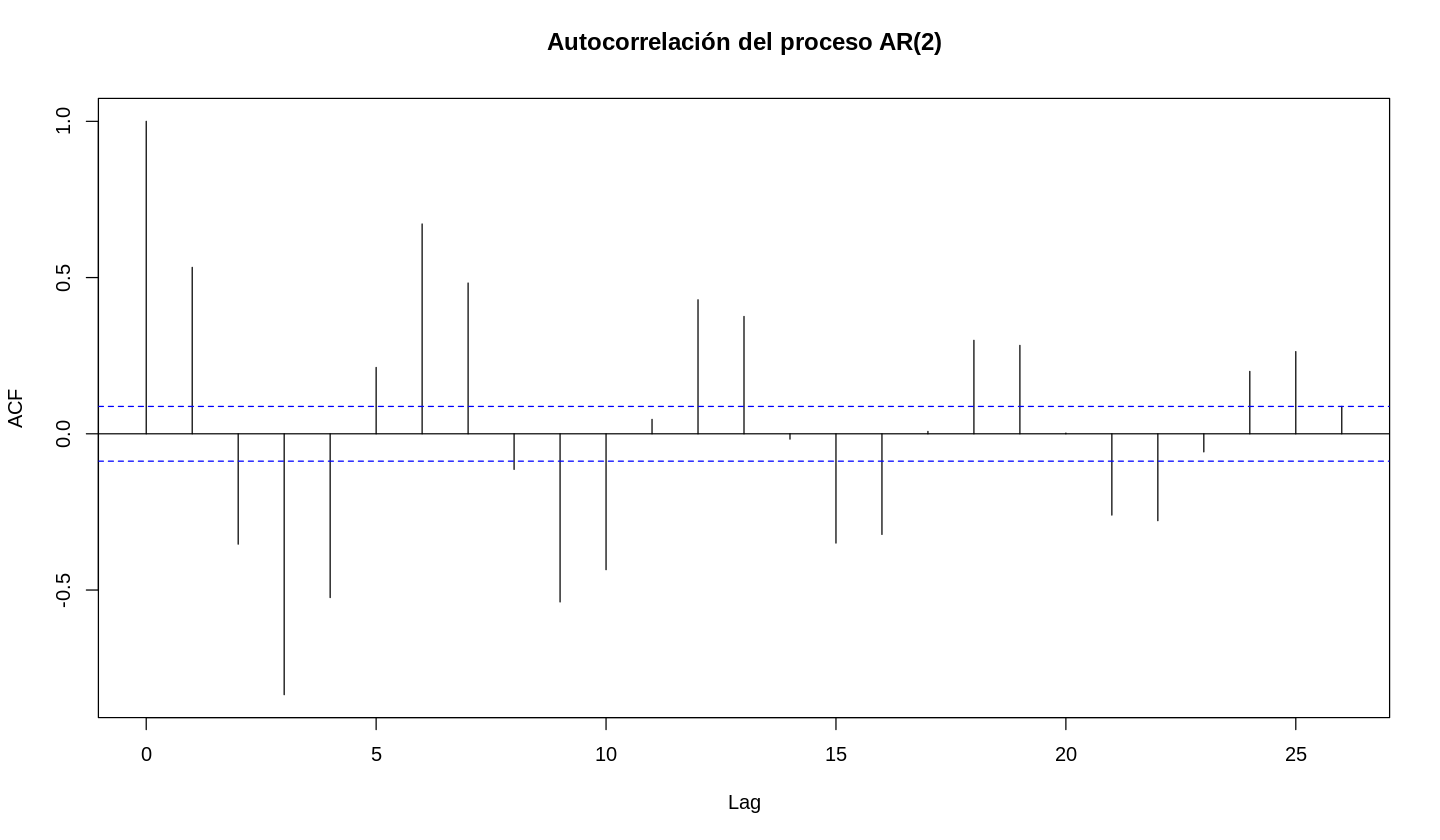

In [42]:
acf(x, main="Autocorrelación del proceso AR(2)")

> **Ejemplo:**
>
>Consideremos el proceso:
> $$x_t = 0.9 x_{t-1} + w_t.$$
>
> Con $x_{0}$ dado (por ejemplo 0).

Este es un proceso *autorregresivo de orden 1*. Cada muestra recuerda a la anterior.

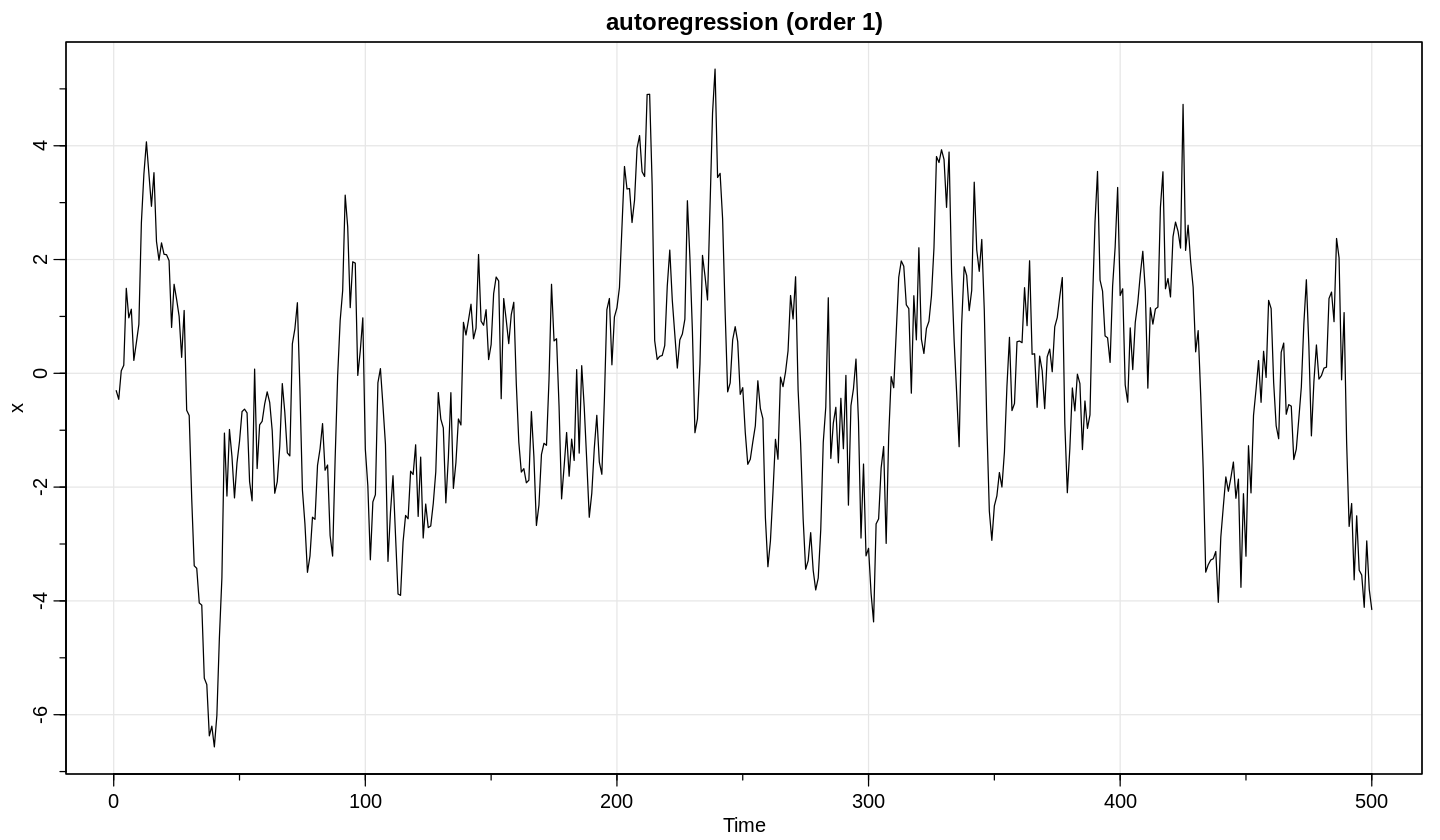

In [43]:
#esto se construye con el comando "filter" de R
x = filter(w, filter=c(0.9), method="recursive")
tsplot(x, main="autoregression (order 1)")

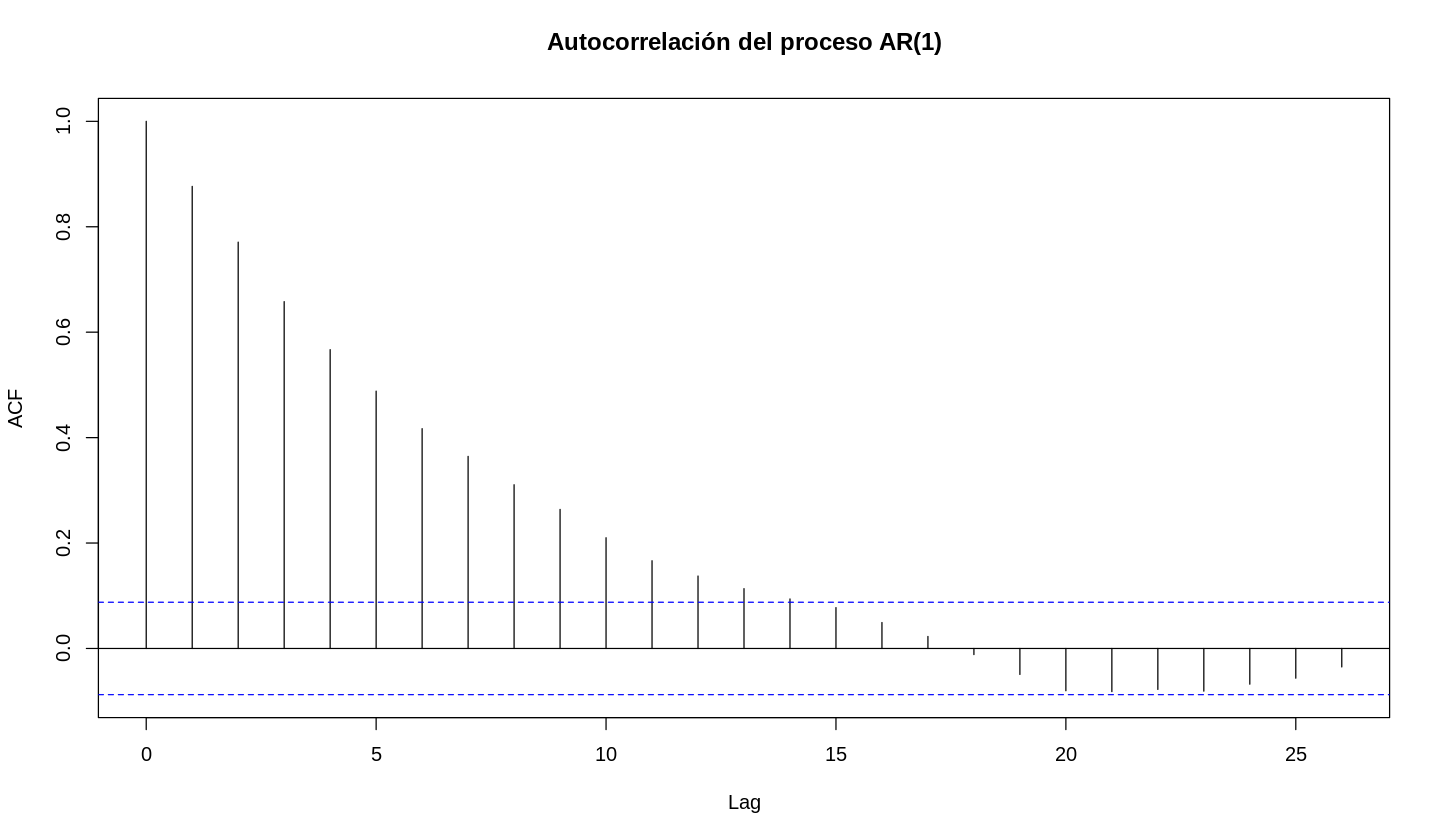

In [44]:
acf(x, main="Autocorrelación del proceso AR(1)")

**Pregunta:** ¿Cómo podemos determinar el orden de un proceso de este tipo? ¿Cómo podemos determinar sus parámetros?

### Estimación de un AR(1)

Probemos mirar la correlación entre un valor y el anterior:

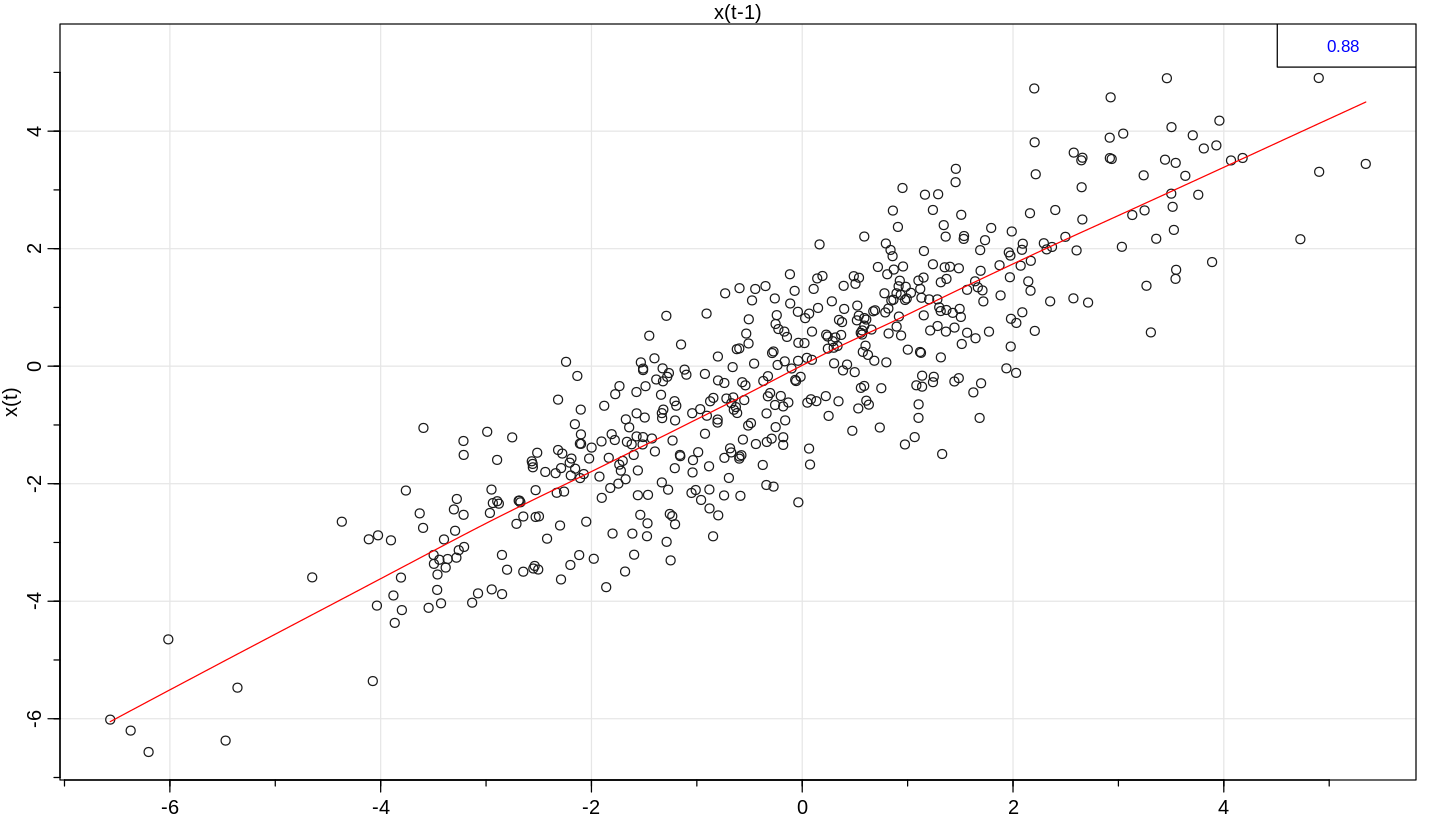

In [45]:
#Este comando plotea x_t vs x_t-1
lag1.plot(x,1)

In [46]:
dos_series = ts.intersect(x,xt1=lag(x,-1))
fit <- lm(x~0+xt1,data=dos_series)
summary(fit)


Call:
lm(formula = x ~ 0 + xt1, data = dos_series)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.66964 -0.72131  0.05024  0.57274  2.77797 

Coefficients:
    Estimate Std. Error t value Pr(>|t|)    
xt1  0.88504    0.02126   41.64   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9663 on 498 degrees of freedom
Multiple R-squared:  0.7769,	Adjusted R-squared:  0.7764 
F-statistic:  1734 on 1 and 498 DF,  p-value: < 2.2e-16


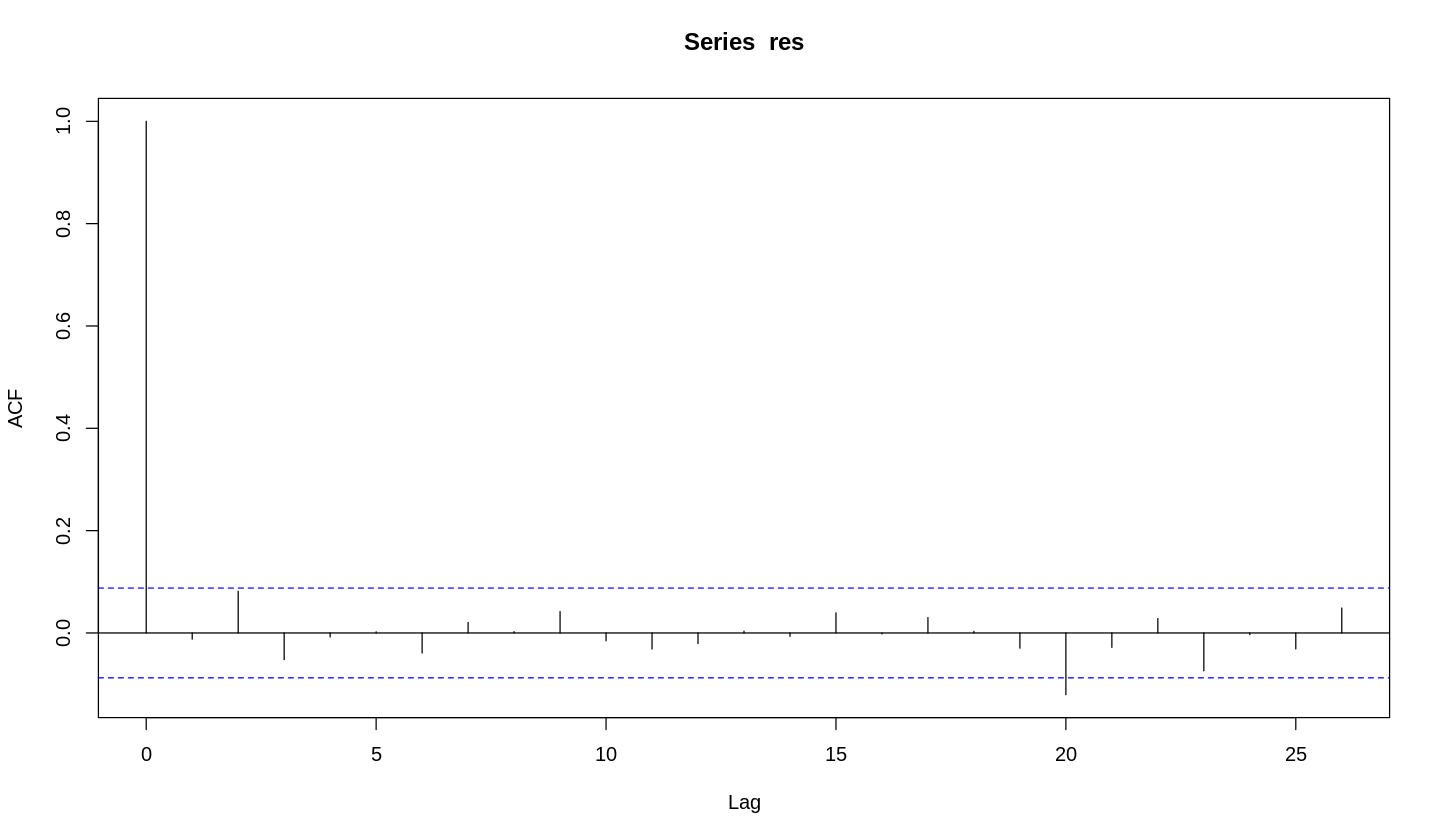

In [47]:
#Miramos los residuos del ajuste
res = residuals(fit)
acf(res)

### Probemos ahora con el AR(2)

$$x_t = x_{t-1} - 0.9x_{t-2} + w_t.$$

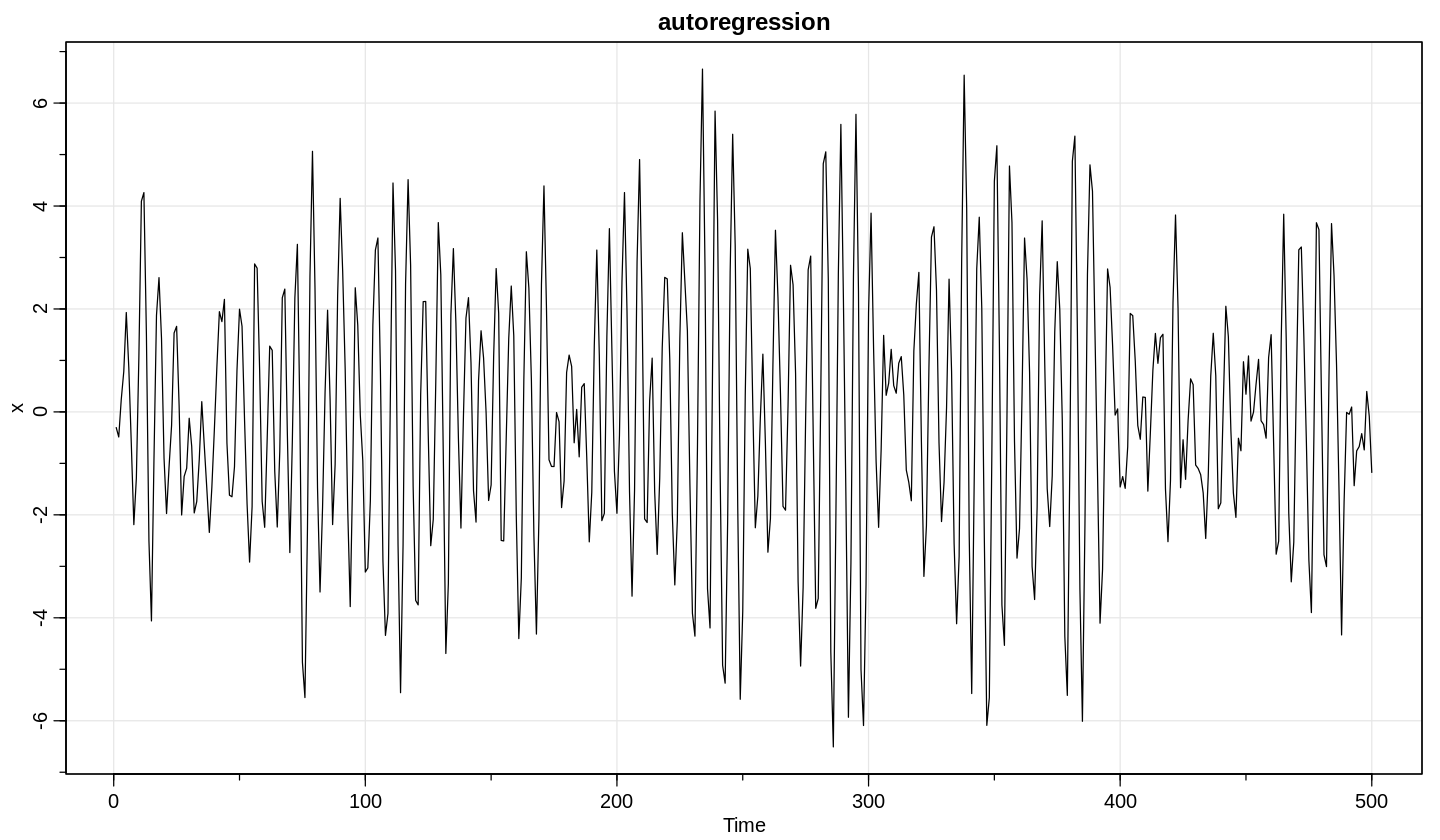

In [48]:
#esto se construye con el comando "filter" de R
x = filter(w, filter=c(1,-.9), method="recursive")
tsplot(x, main="autoregression")

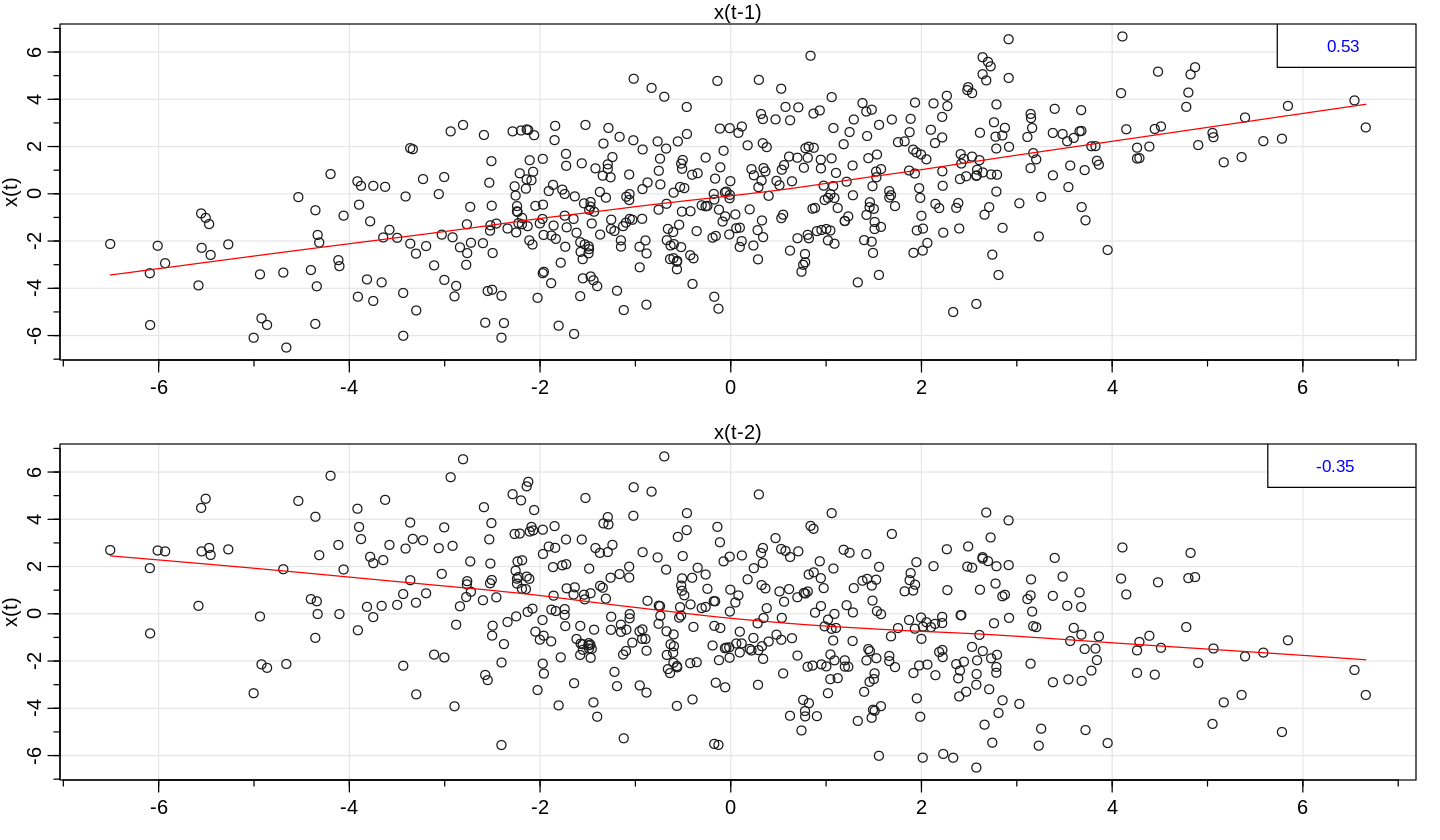

In [49]:
lag1.plot(x,2)

In [50]:
tres_series = ts.intersect(x,xt1=lag(x,-1),xt2=lag(x,-2))
fit <- lm(x~0+xt1+xt2,data=tres_series)
summary(fit)


Call:
lm(formula = x ~ 0 + xt1 + xt2, data = tres_series)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.75987 -0.71735  0.05765  0.59867  2.73432 

Coefficients:
    Estimate Std. Error t value Pr(>|t|)    
xt1  1.00695    0.02053   49.04   <2e-16 ***
xt2 -0.88961    0.02053  -43.33   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.968 on 496 degrees of freedom
Multiple R-squared:  0.8503,	Adjusted R-squared:  0.8497 
F-statistic:  1409 on 2 and 496 DF,  p-value: < 2.2e-16


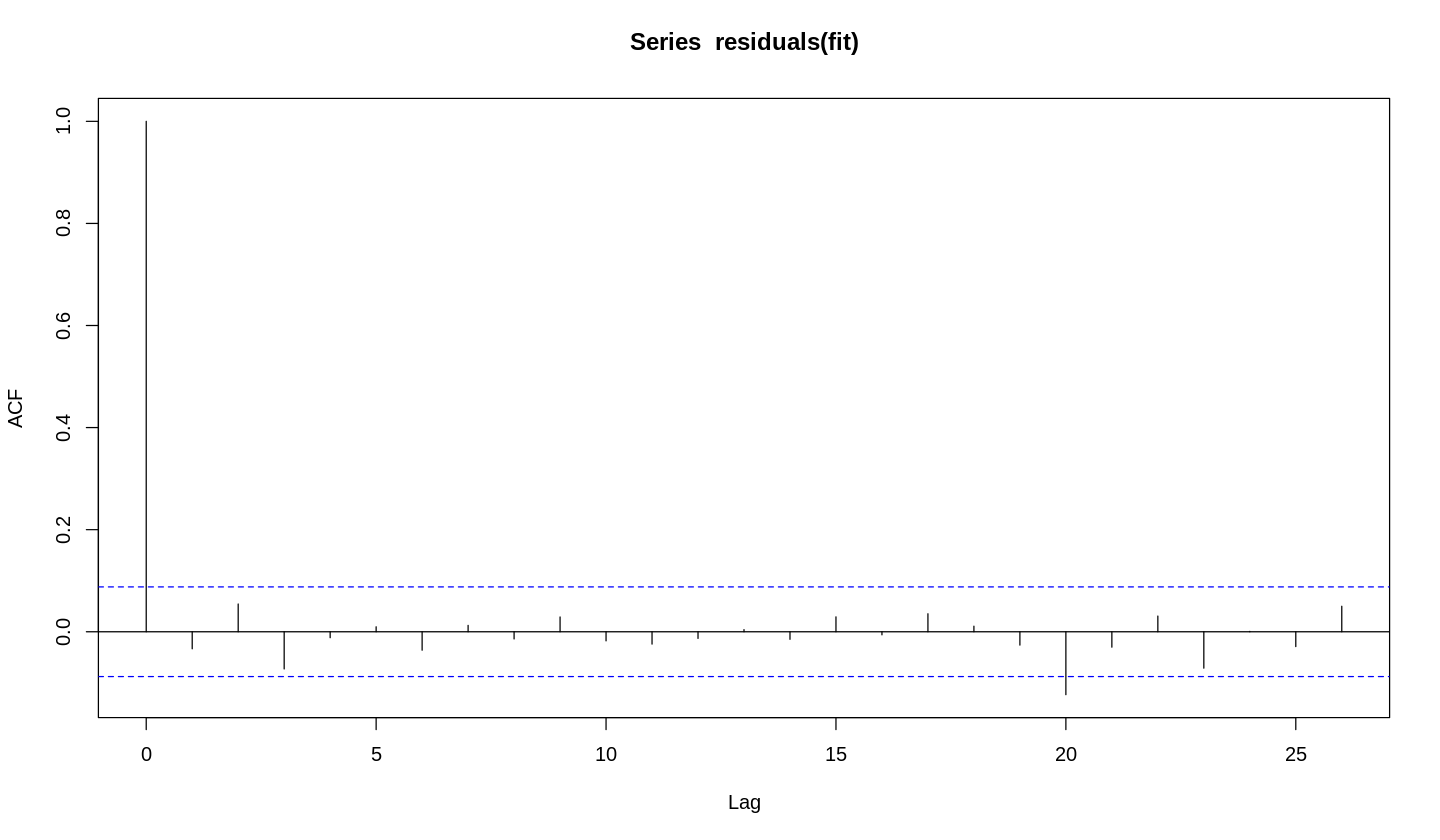

In [51]:
acf(residuals(fit))

Comparemos los residuos con el ruido que dio origen a la serie:

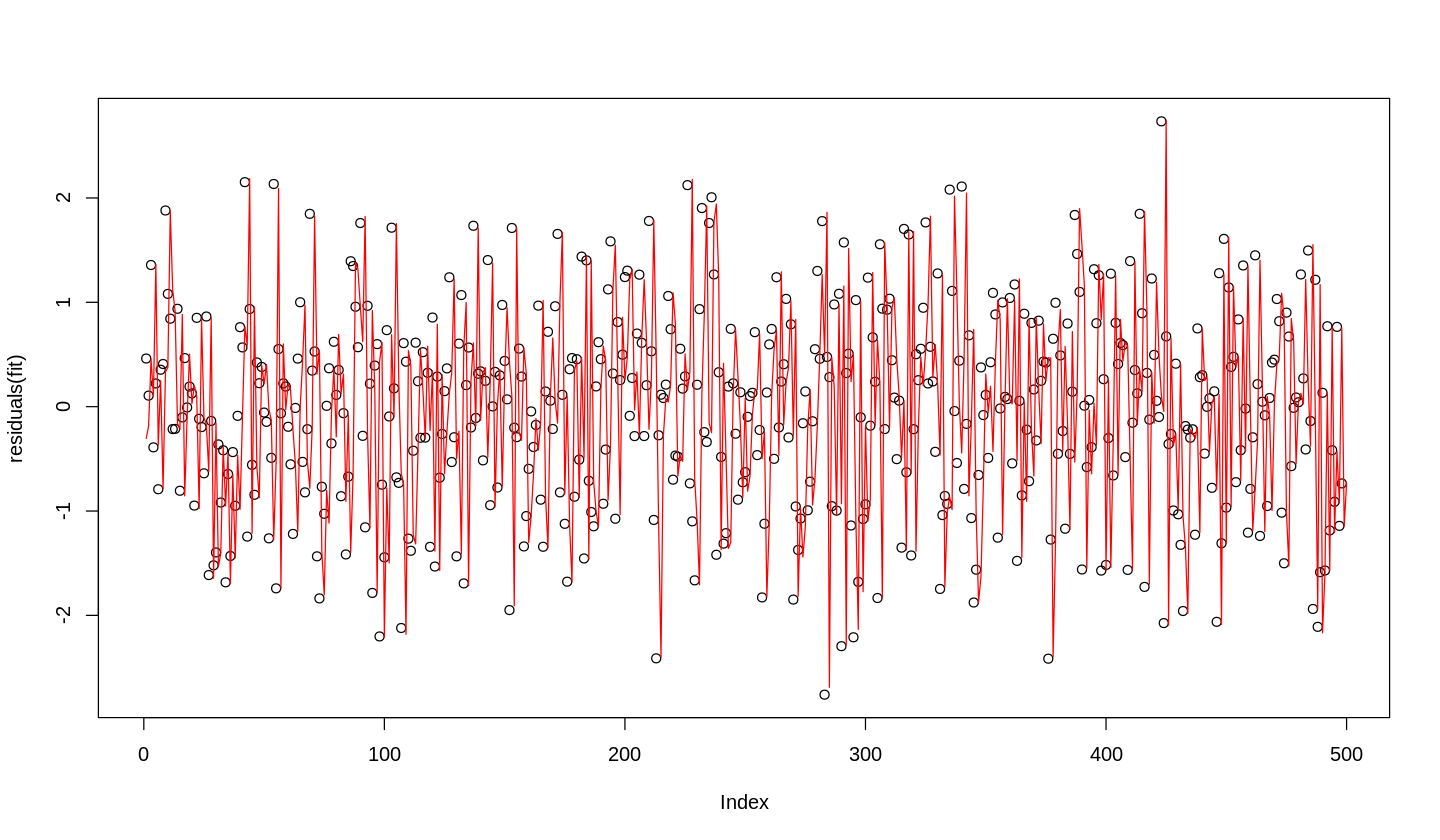

In [52]:
plot(residuals(fit))
lines(w,col="red")

### Conclusiones:

* En un modelo AR(p), cada muestra depende del ruido actual y de una combinación lineal de las observaciones anteriores

* La autocorrelación de todos modos depende de todas las muestras que vinieron antes!

* Si conocemos el *orden* del modelo, podemos hacer una regresión lineal para explicar $x_t$ a partir de $x_{t-1}$ hasta $x_{t-p}$. De ese modo se obtienen los valores de los coeficientes.

* Si el proceso ajusta, los residuos deben coincidir con los del ruido blanco y se parecen al ruido que dio origen a la serie.

### ¿Cómo averiguamos el orden del modelo? Función de autocorrelación parcial (PACF)

**Idea:** construir una función de correlación que solo contenga los aportes "incrementales" de agregar un lag, y no la correlación completa.

Se explica mejor a través de un ejemplo, dejaremos la teoría para más adelante.

Retomemos la serie:

$$x_t = x_{t-1} - 0.9 x_{t-2} + w_t.$$

Recordemos la función de autocorrelación (ACF)

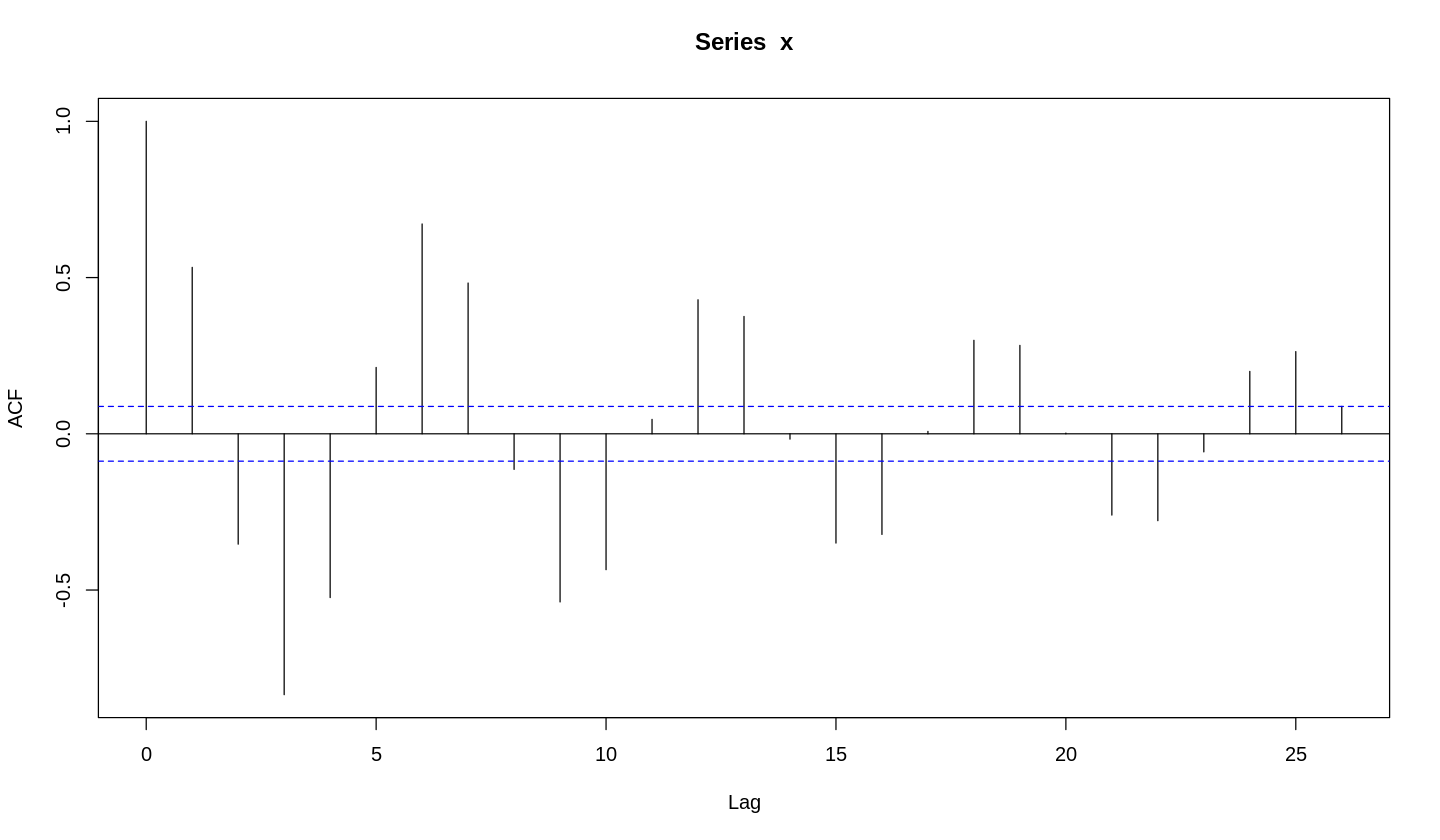

In [53]:
acf(x)

**Paso 1:** Ajustamos $x_t$ a $x_{t-1}$:

In [54]:
#Corto la serie x con la serie x laggeada
dos_series = ts.intersect(x,xt1=lag(x,-1))
#Ajusto
fit1 <- lm(x~0+xt1,data=dos_series)
summary(fit1) #el coef. hallado es la correlación de xt y xt-1, es decir acf(1)


Call:
lm(formula = x ~ 0 + xt1, data = dos_series)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.2468 -1.4613 -0.0411  1.4752  5.4120 

Coefficients:
    Estimate Std. Error t value Pr(>|t|)    
xt1  0.53291    0.03793   14.05   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.113 on 498 degrees of freedom
Multiple R-squared:  0.2839,	Adjusted R-squared:  0.2824 
F-statistic: 197.4 on 1 and 498 DF,  p-value: < 2.2e-16


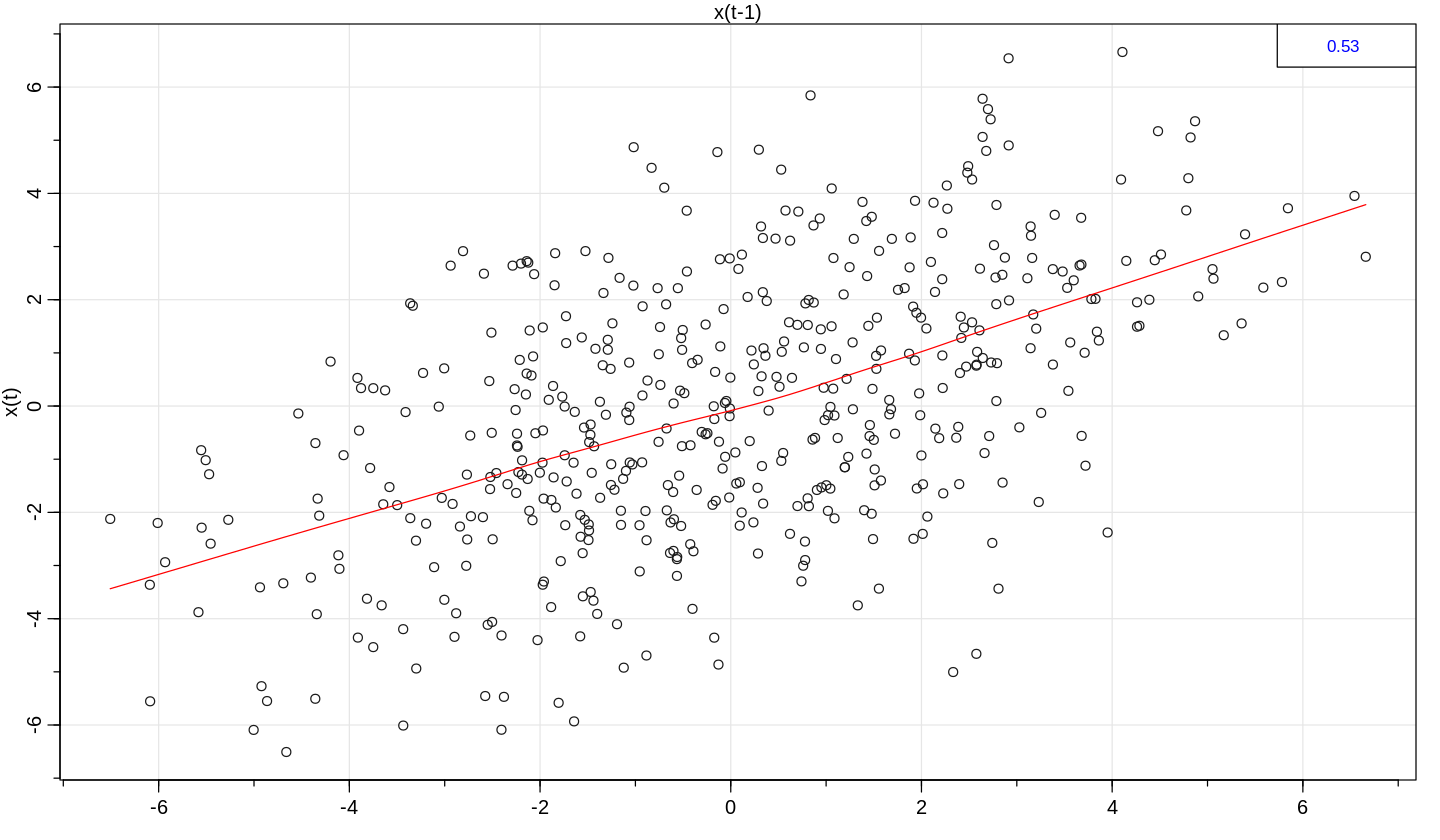

In [55]:
lag1.plot(x,1)

In [56]:
#capturo los residuos del ajuste anterior y construyo una serie temporal
r1 = residuals(fit1)
r1=ts(r1)

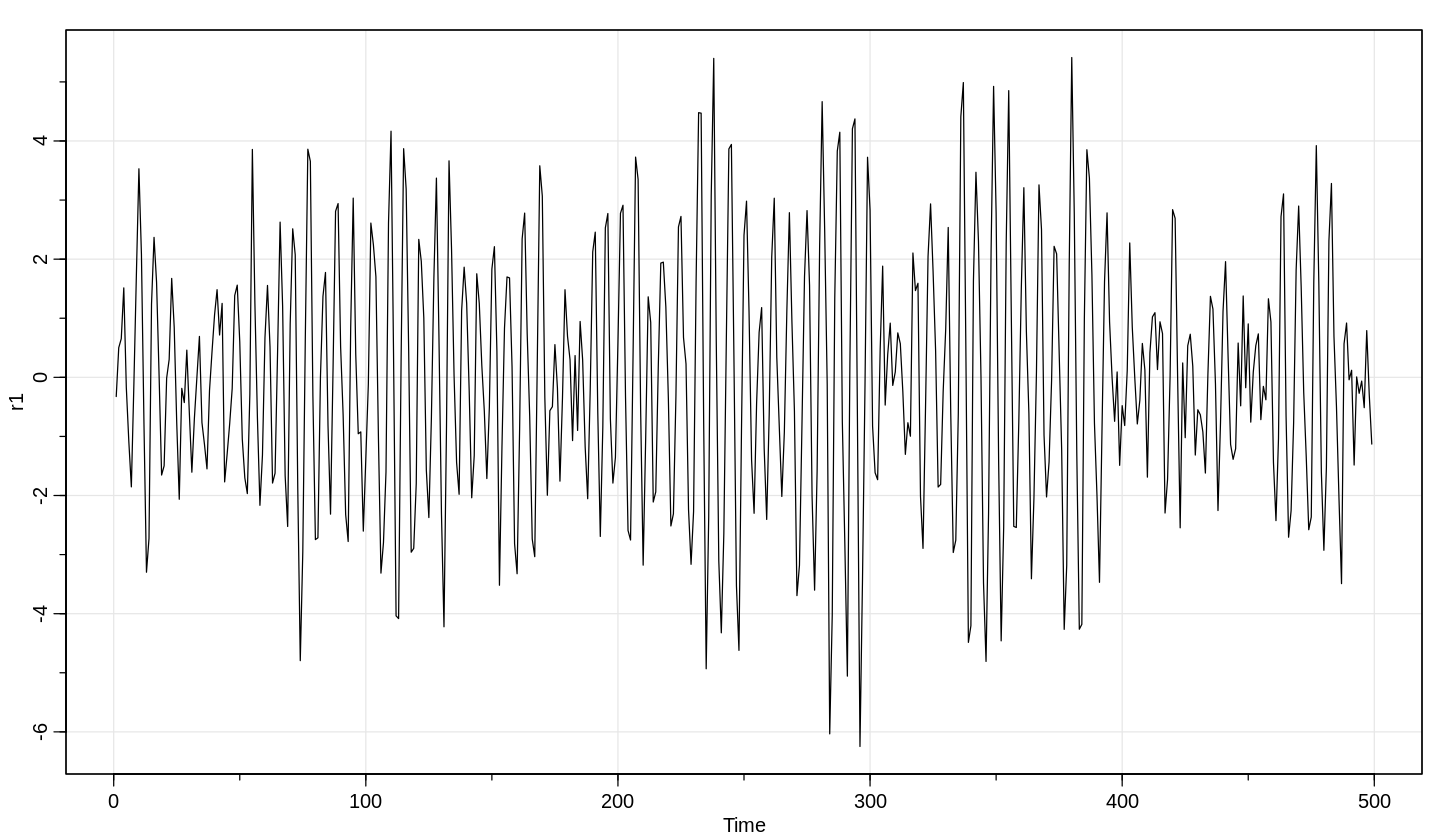

In [57]:
tsplot(r1)

* Si el proceso fuera de orden $1$, entonces una vez que conozco $x_{t-1}$, $x_t$ queda determinado a menos del ruido, por lo que el residuo no debería tener información.

* La serie anterior todavía no está del todo "blanca" quiere decir que debemos seguir un paso más.

* Problema: no alcanza con mirar otro lag, debemos "extraer" la información de $x_{t-2}$ que persiste en $x_t$.

* Para ello, miramos los residuos de los dos ajustes siguientes:

    * Ajusto $x_t$ a $x_{t-1}$, obtengo $r_1$ (es el mismo de antes).
    * Ajusto $x_{t-2}$ a $x_{t-1}$ para extraer la info propia de $x_{t-2}$. Obtengo $r_2$.
    * Calculo la correlación entre $r_1$ y $r_2$ (o bien ajusto lineal $r_2$ a $r_1$, es lo mismo). Al resultado se le llama *autocorrelación parcial* entre $x_t$ y $x_{t-2}$ (o de lag 2).

In [60]:
#Realizo el procedimiento anterior
tres_series = ts.intersect(x,xt1=lag(x,-1),xt2=lag(x,-2))

#Ajusto r1
fit1 <- lm(x~0+xt1,data=tres_series)
summary(fit1)
r1=residuals(fit1)


Call:
lm(formula = x ~ 0 + xt1, data = tres_series)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.2467 -1.4726 -0.0318  1.4788  5.4120 

Coefficients:
    Estimate Std. Error t value Pr(>|t|)    
xt1  0.53288    0.03797   14.04   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.115 on 497 degrees of freedom
Multiple R-squared:  0.2839,	Adjusted R-squared:  0.2824 
F-statistic:   197 on 1 and 497 DF,  p-value: < 2.2e-16


In [61]:
#Ajusto r2
fit2 <- lm(xt2~0+xt1,data=tres_series)
summary(fit2)
r2=residuals(fit2)


Call:
lm(formula = xt2 ~ 0 + xt1, data = tres_series)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3762 -1.4896 -0.0188  1.6125  5.2202 

Coefficients:
    Estimate Std. Error t value Pr(>|t|)    
xt1  0.53289    0.03796   14.04   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.115 on 497 degrees of freedom
Multiple R-squared:  0.284,	Adjusted R-squared:  0.2825 
F-statistic: 197.1 on 1 and 497 DF,  p-value: < 2.2e-16


[1] -0.8894928

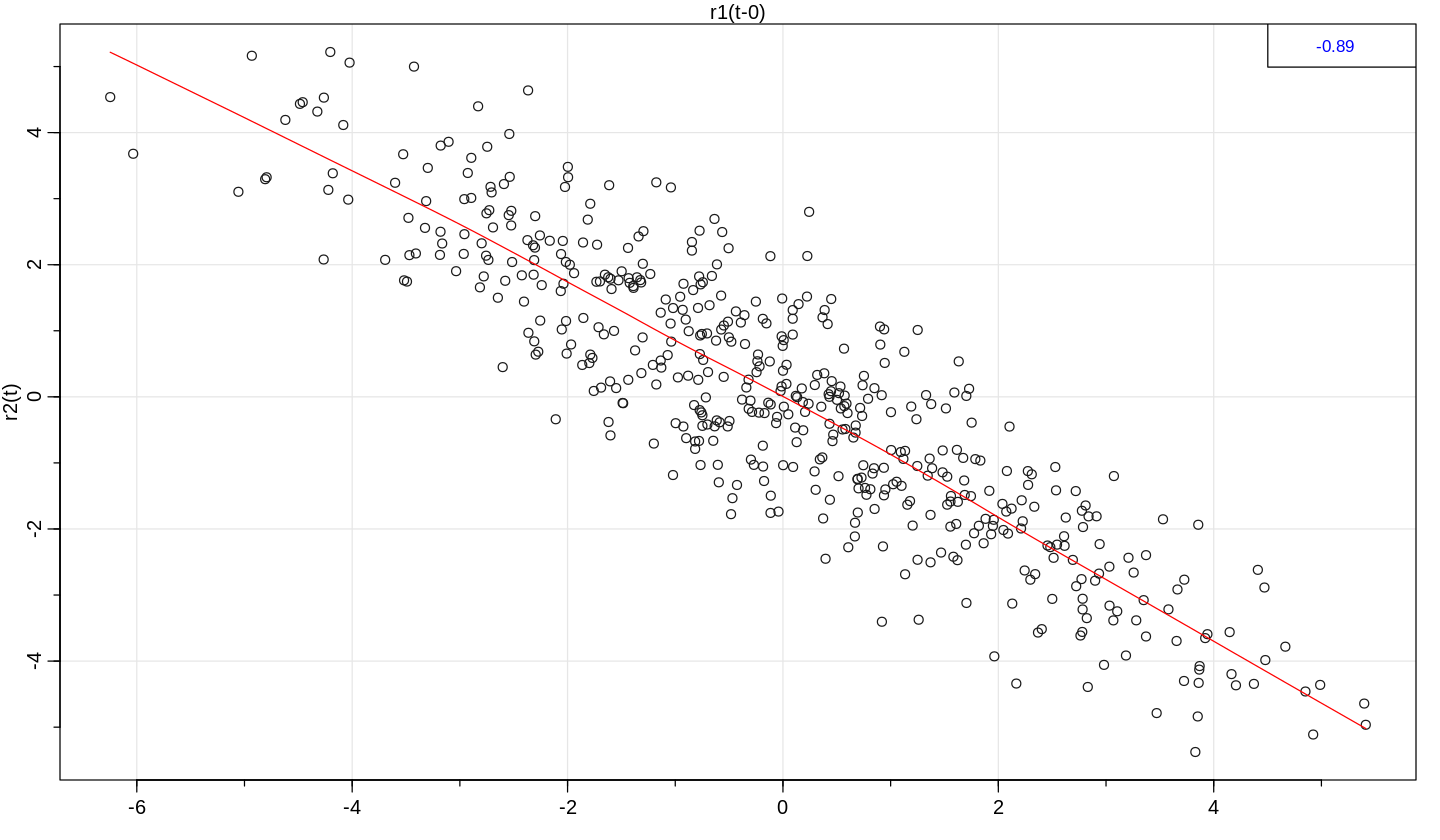

In [62]:
lag2.plot(r1,r2)
cor(r1,r2)

El método anterior puede repetirse para todos los lags. Simplemente:

 * Ajusto $x_t$ a $x_{t-1},\ldots,x_{t-p+1}$, obtengo $r_1$.
 * Ajusto $x_{t-p}$ a $x_{t-1},\ldots,x_{t-p+1}$, obtengo $r_2$.
 * Calculo la correlación entre $r_1$ y $r_2$ (o bien ajusto lineal $r_2$ a $r_1$, es lo mismo). Al resultado se le llama *autocorrelación parcial* entre $x_t$ y $x_{t-p}$ (o de lag $p$).
 
 Hagamoslo un paso más ($p=3$) para ver que ya no queda información.

In [64]:
#Realizo el procedimiento anterior
cuatro_series = ts.intersect(x,xt1=lag(x,-1),xt2=lag(x,-2),xt3=lag(x,-3))

#Ajusto r1
fit1 <- lm(x~0+xt1+xt2,data=cuatro_series)
r1=residuals(fit1)
#Ajusto r2
fit2 <- lm(xt3~0+xt1+xt2,data=cuatro_series)
r2=residuals(fit2)

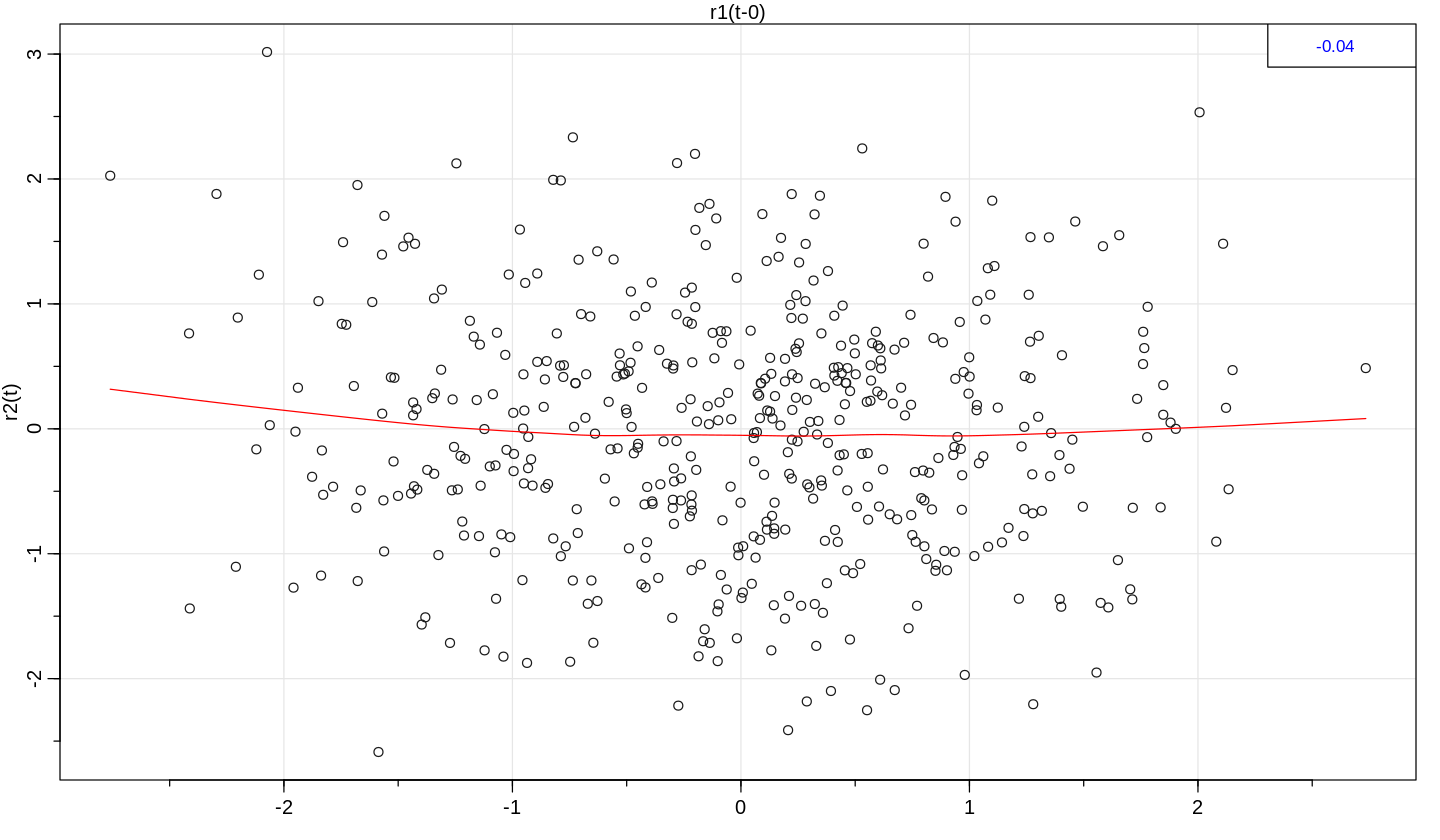

In [65]:
lag2.plot(r1,r2)

### Función de autocorrelación parcial (PACF)

* A la función así construida recursivamente se le denomina Función de Autocorrelación Parcial (PACF).
* En el ejemplo anterior, la PACF(1) coincide con la CCF(1). La PACF(2) *NO* (es otra información).
* En el proceso AR(2), la PACF(2) era significativa, la PACF(3) se vuelve 0.
* En general, si un proceso es AR($p$), entonces la PACF se "apaga" luego de $p$.

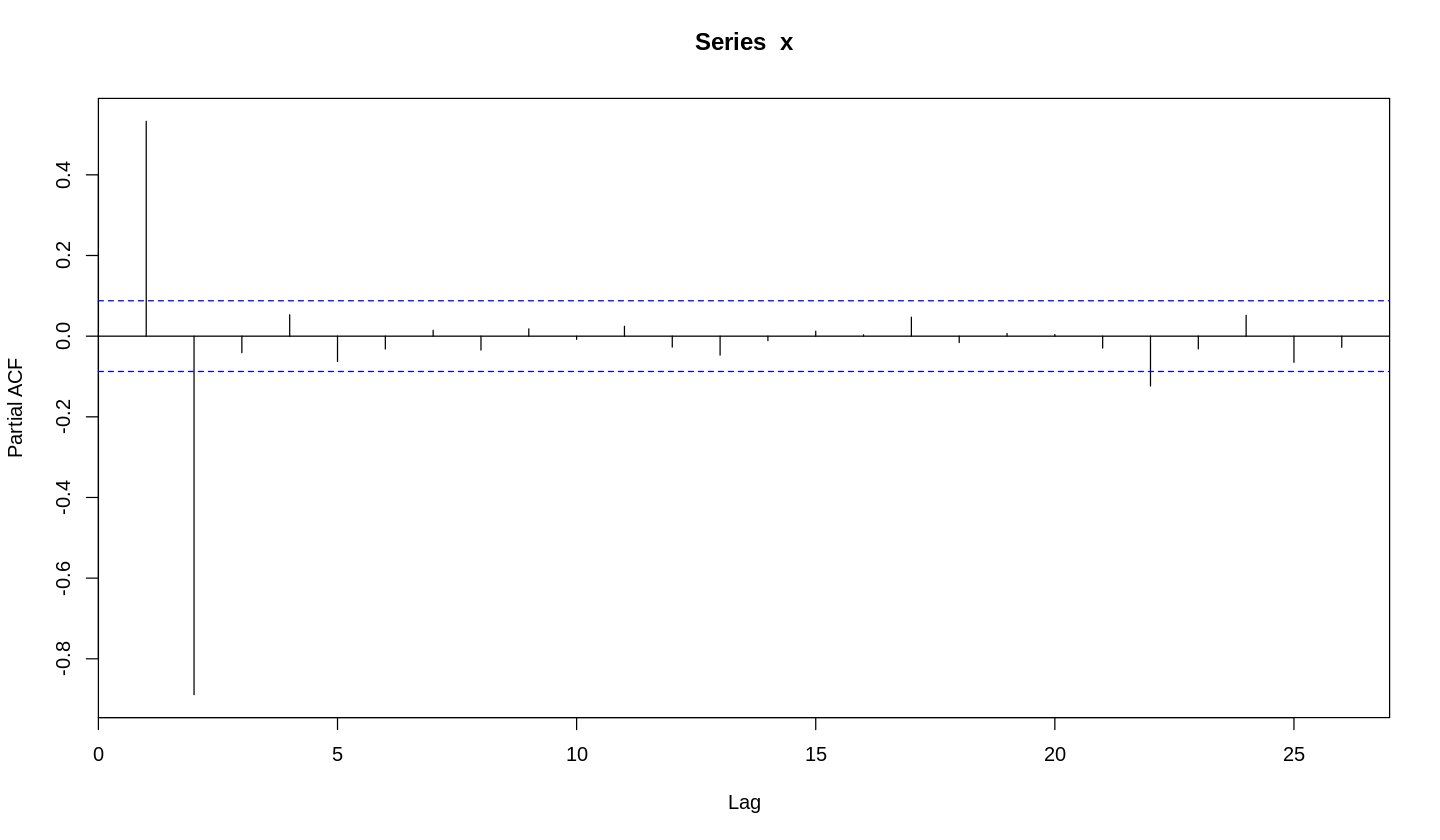

In [66]:
#En R, podemos calcular la PACF usando el algoritmo de Durbin-Levinson:
pacf(x)

Apliquemos la misma idea al proceso AR(1) que teníamos antes

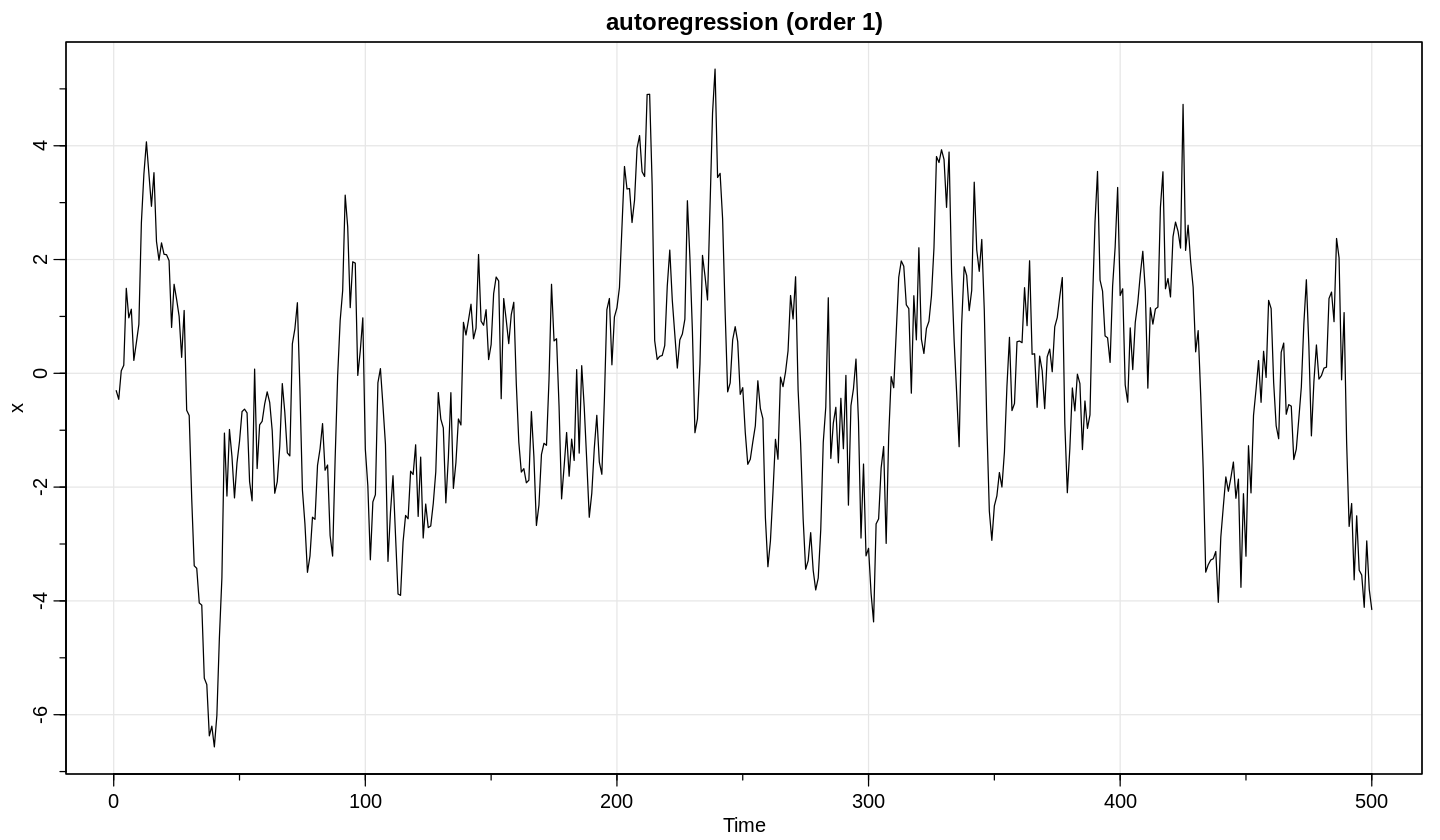

In [67]:
#esto se construye con el comando "filter" de R
x = filter(w, filter=c(0.9), method="recursive")
tsplot(x, main="autoregression (order 1)")

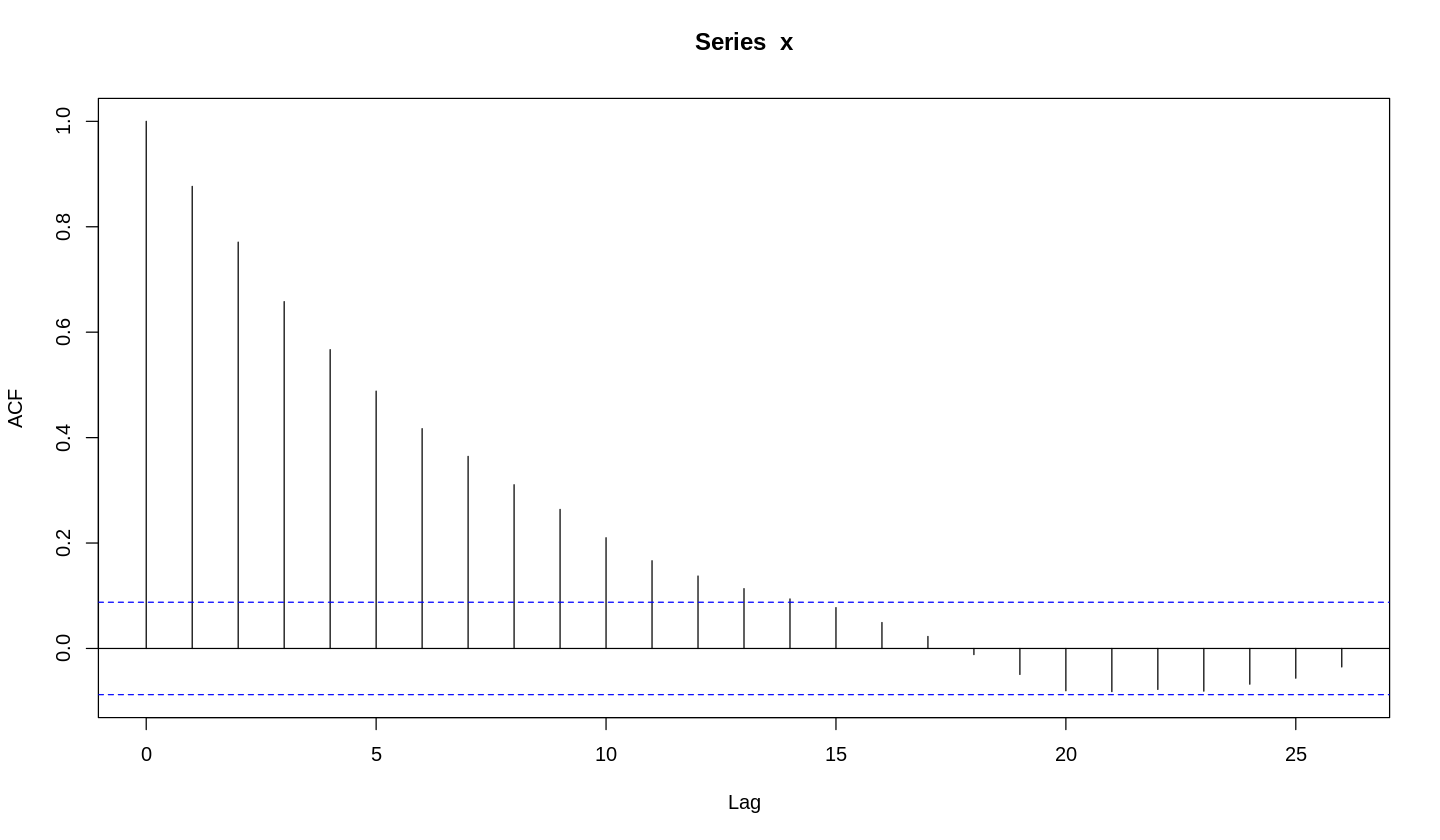

In [68]:
acf(x)

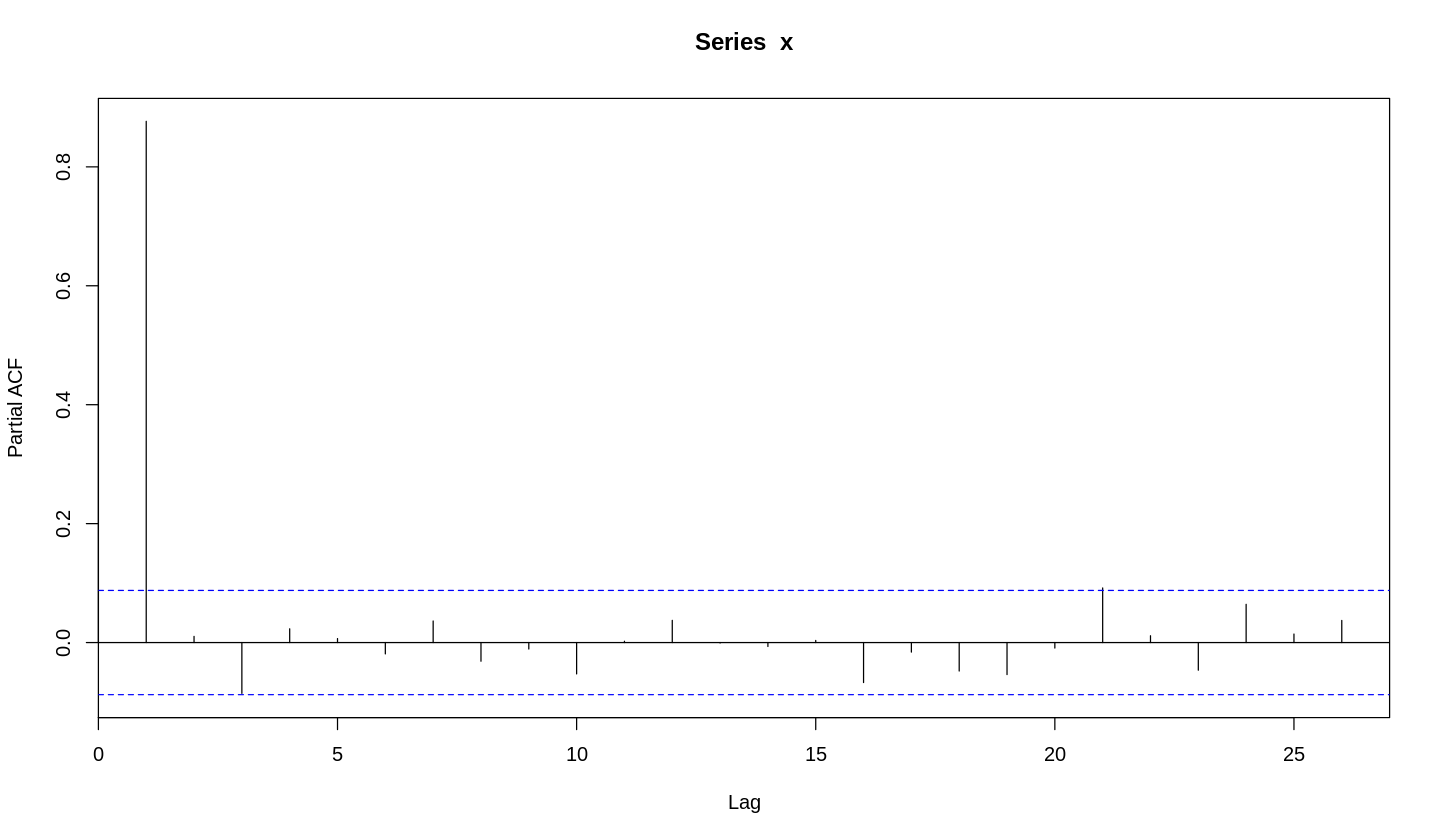

In [69]:
pacf(x)

## Resumen

* En un proceso autorregresivo puro, el valor de la serie en tiempo $t$ depende de los $p$ anteriores más una innovación o ruido en ese punto.

* Por lo tanto, todas las muestras anteriores tienen influencia en la muestra actual (aunque decae exponencialmente).

* La función de autocorrelación entonces decae a $0$ exponencialmente, pero no se anula.

* La función de autocorrelación *parcial* elimina las dependencias internas y permite estimar el orden de un autorregresivo puro.

* Una vez que conocemos el orden, podemos hacer regresión para hallar los coeficientes. `fit<- lm(x~xt1+xt2+xt3...)`

## Predicción a futuro

El siguiente paso es, una vez ajustado un proceso autorregresivo, predecir sus valores a futuro.

Idealmente, queremos hallar:
$$\hat{x}_{n+m} = g(x_1,\ldots,x_n)$$
de modo que:
$$MSE = E[(x_{n+m} - \hat{x}_{n+m})^2]$$
se minimice.


El estimador ideal es la esperanza condicional:

$$\hat{x}_{n+m} = E[x_{n+m} \mid x_1,\ldots,x_n]$$

En el caso de procesos lineales ARMA, este estimador se puede calcular mediante el algoritmo de Durbin-Levinson que veremos más adelante. Sin embargo, en el caso del autorregresivo puro es más simple. Una vez que se conocen los parámetros del modelo:

$$x_{t} = \phi_1 x_{t-1} + \phi_2 x_{t-2} + \ldots + \phi_p x_{t-p} + w_t.$$

Entonces la mejor predicción de $x_{p+1}$ es simplemente realizar la combinación lineal de los últimos $p$ valores:
$$\hat{x}_{n+1} = \phi_1 x_{n} + \phi_2 x_{n-1} + \ldots + \phi_p x_{n-p+1}$$

y luego recursivamemte se pueden construir las estimaciones de $x_{n+2},x_{n+3},\ldots$ etc.



### Ejemplo:

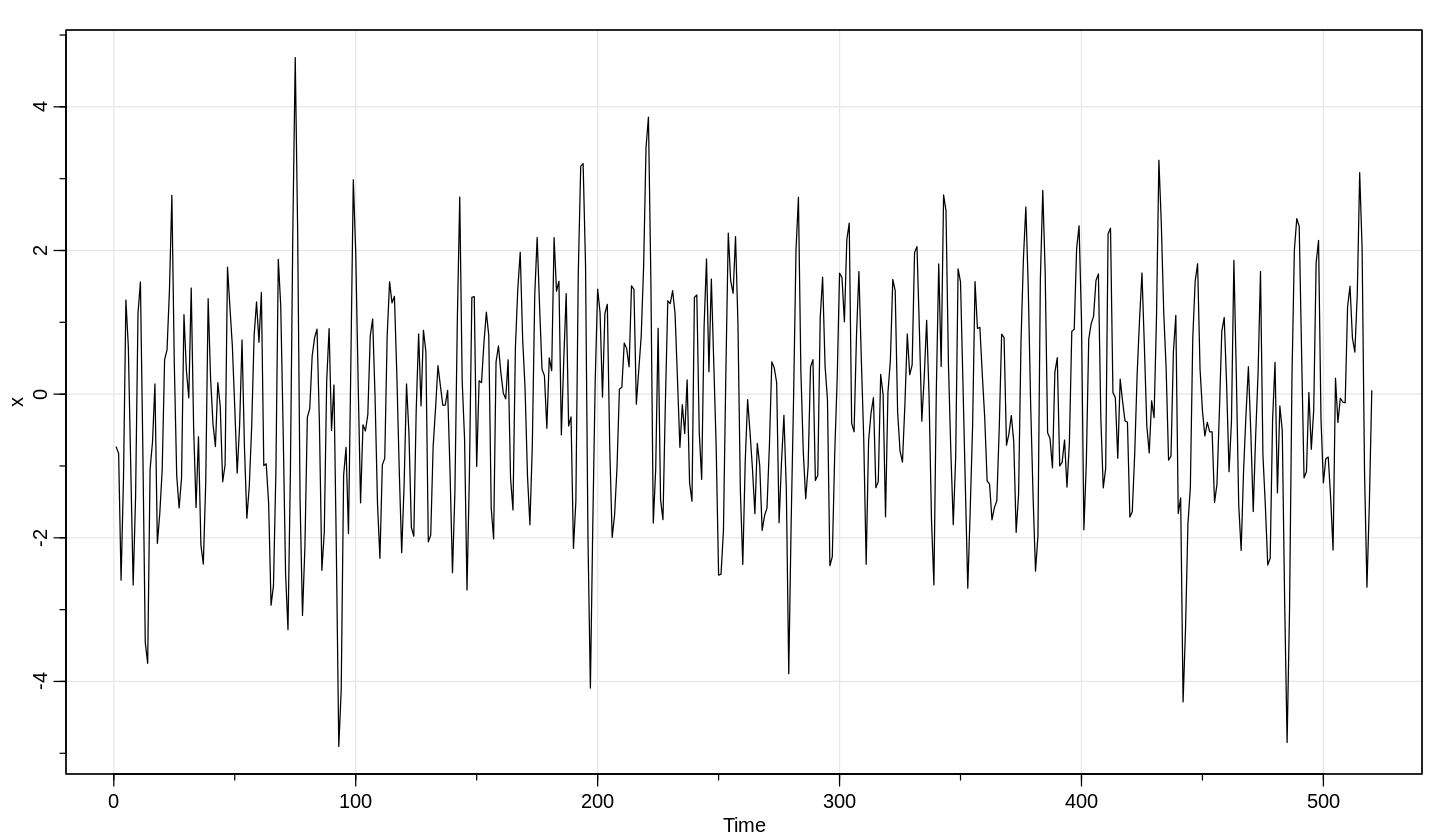

In [144]:
##Simulamos un AR(2) usando ahora la función propia de R
# order=c(p,q,r) quiere decir p=orden del AR, q=orden del MA, r = orden del integrador.
# order=c(2,0,0) es un AR(2) puro, el parámetro ar le pasa los coeficientes.

x = arima.sim(list(order=c(2,0,0), ar=c(.9,-.5)), n=520)
x=ts(x)
tsplot(x)

Ajustamos los coeficientes con los primeros 500 datos y predecimos los otros 20.

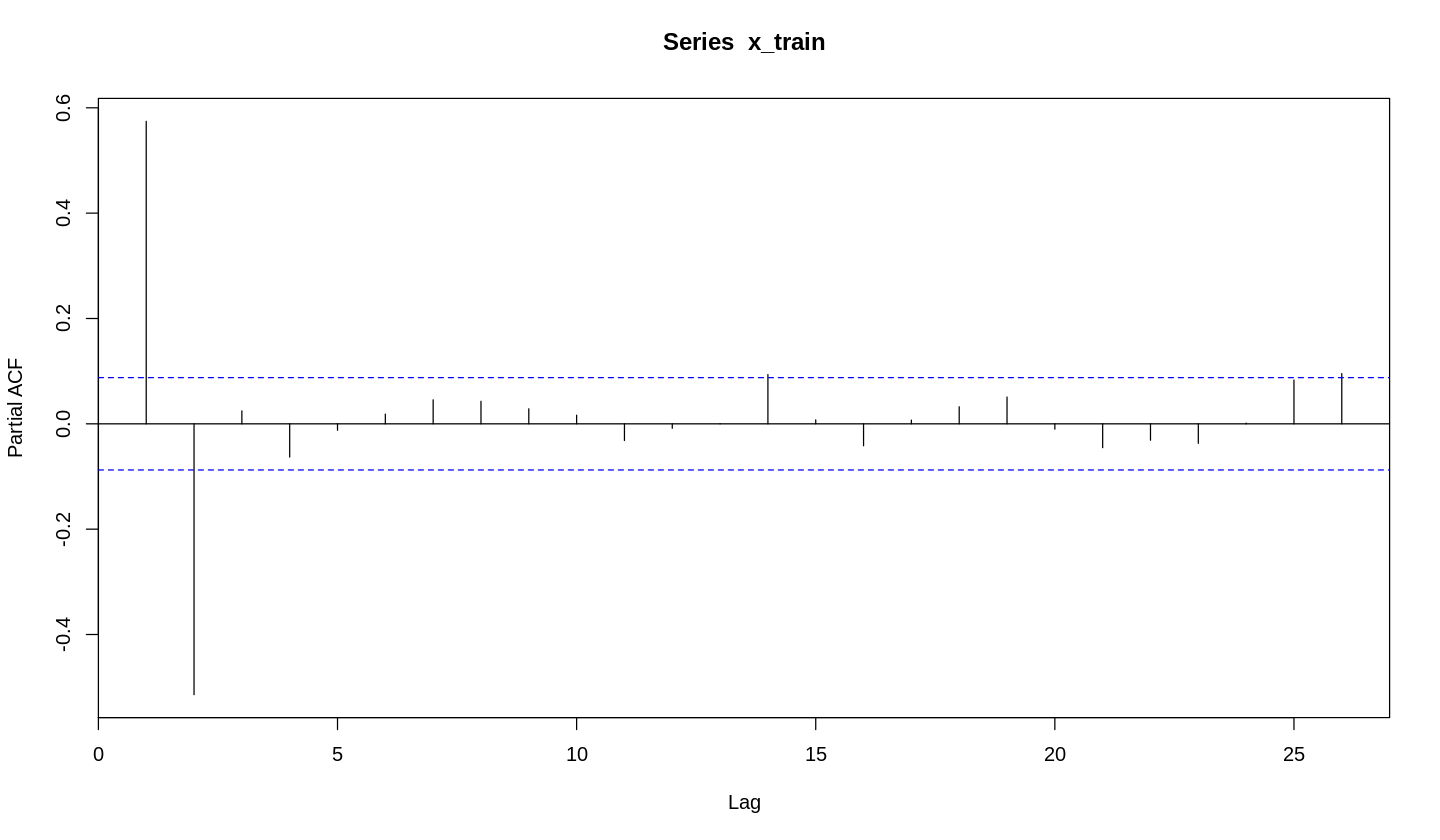

In [145]:
## Recorto la serie
x_train = ts(head(x,500))
## Chequeo la PACF
pacf(x_train)

In [146]:
#Estimo los coeficientes por regresión
tres_series = ts.intersect(x=x_train,xt1=lag(x_train,-1),xt2=lag(x_train,-2))
fit <- lm(x~0+xt1+xt2,data=tres_series)
summary(fit)
phi1 <- fit$coef["xt1"]
phi2 <- fit$coef["xt2"]
phi1
phi2


Call:
lm(formula = x ~ 0 + xt1 + xt2, data = tres_series)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8696 -0.7483 -0.0652  0.5746  3.3649 

Coefficients:
    Estimate Std. Error t value Pr(>|t|)    
xt1  0.87501    0.03861   22.66   <2e-16 ***
xt2 -0.51163    0.03860  -13.25   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.031 on 496 degrees of freedom
Multiple R-squared:  0.5087,	Adjusted R-squared:  0.5067 
F-statistic: 256.8 on 2 and 496 DF,  p-value: < 2.2e-16


xt1 
0.8750113

xt2 
-0.5116322

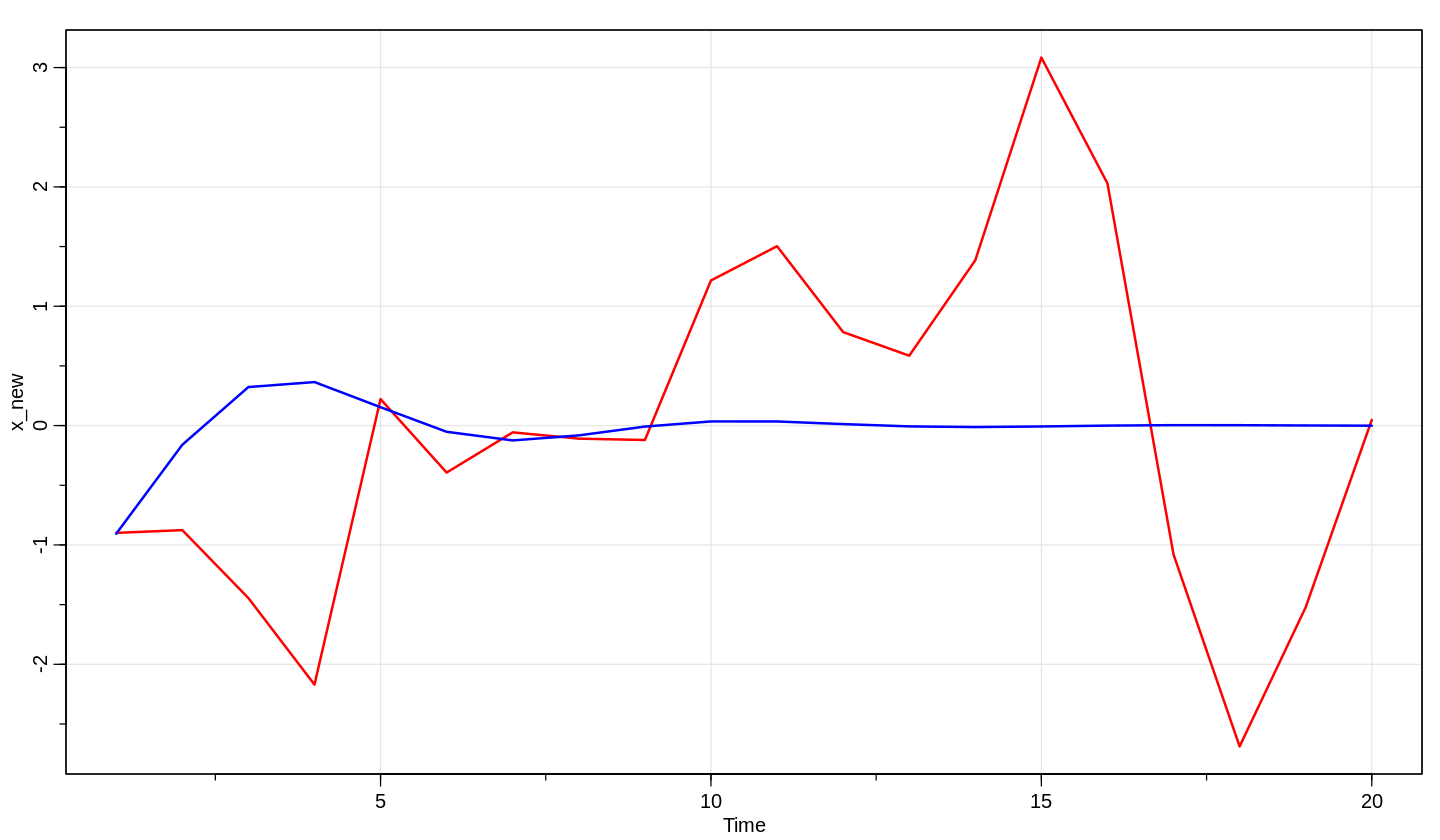

In [148]:
x_new <- ts(tail(x,20))
x_hat <- vector()
x_hat[1] = phi1 * x_train[500] + phi2*x_train[499]
x_hat[2] = phi1 * x_hat[1] + phi2*x_train[500]

for (i in 3:20)
{
    x_hat[i] = phi1 * x_hat[i-1] + phi2*x_hat[i-2]
}

tsplot(x_new,col="red", lwd=2)
lines(x_hat,col="blue", lwd=2)

### Observaciones

* La predicción solo es razonable a pocos intervalos.
* A la larga vuelve a la media ya que promedia los valores que va obteniendo.
* Dicho de otro modo, como la influencia de los datos hasta $n$ decae exponencialmente después de $n$, es muy difícil predecir más allá de unos pocos pasos.

In [149]:
##Esto es lo mismo, pero hecho con R
fit <- arima(x_train, order = c(2,0,0))
fit


Call:
arima(x = x_train, order = c(2, 0, 0))

Coefficients:
         ar1      ar2  intercept
      0.8698  -0.5138    -0.1457
s.e.  0.0383   0.0383     0.0711

sigma^2 estimated as 1.046:  log likelihood = -721.17,  aic = 1450.34

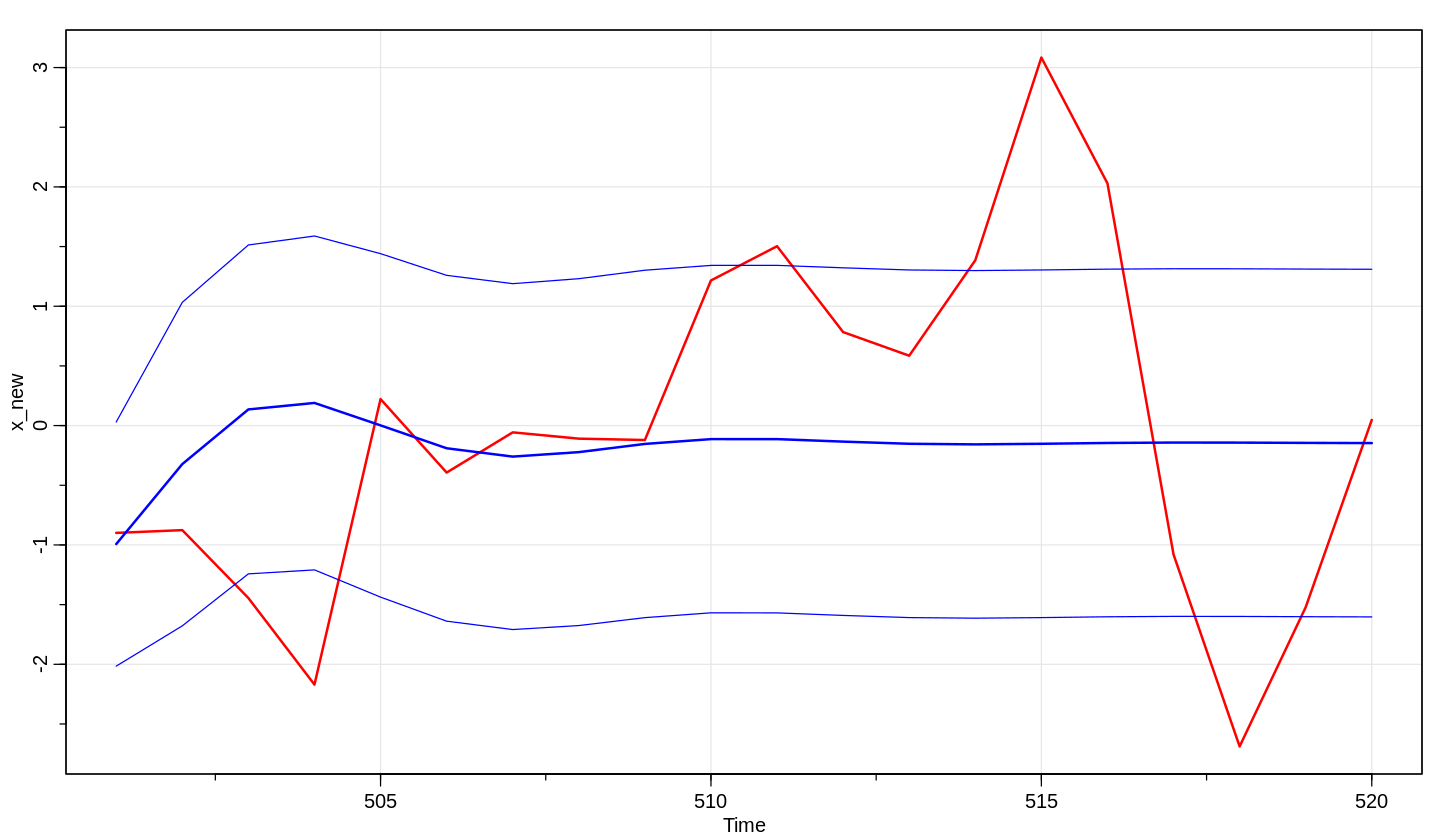

In [150]:
predictions = predict(fit, n.ahead = 20)
x_hat = predictions$pred
se = predictions$se
x_new = ts(tail(x,20),start=501)
tsplot(x_new,col="red", lwd=2)
lines(x_hat,col="blue", lwd=2)
lines(x_hat+se,col="blue", lwd=1)
lines(x_hat-se,col="blue", lwd=1)

### Predicción recursiva

De todos modos, si bien no permite predecir mucho hacia el futuro, podemos ir recursivamente prediciendo el valor $x_{n+1}$ una vez que conocemos $x_{n},x_{n-1},\ldots,x_{n-p+1}$, es decir los últimos $p$.

Luego si recibimos un dato nuevo podemos actualizar la predicción.

### Ejemplo

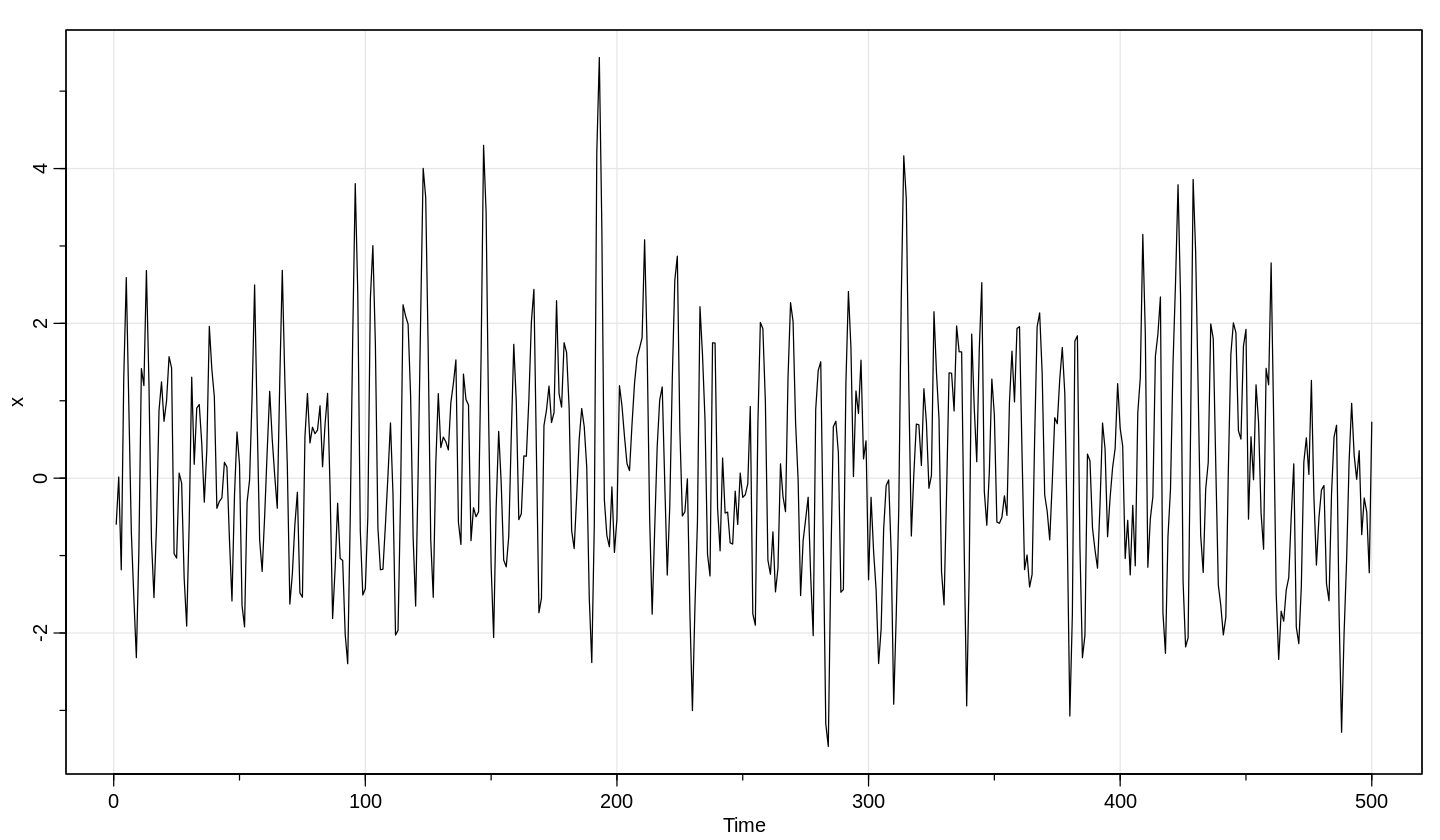

In [151]:
##Simulamos un AR(2) usando ahora la función propia de R
# order=c(p,q,r) quiere decir p=orden del AR, q=orden del MA, r = orden del integrador.
# order=c(2,0,0) es un AR(2) puro, el parámetro ar le pasa los coeficientes.

x = arima.sim(list(order=c(2,0,0), ar=c(.9,-.5)), n=500)
x=ts(x)
tsplot(x)

Supongamos que sabemos exactamente los parámetros, en este caso media $\mu=0$, $\phi_1=0.9$ y $\phi_2=-0.5$.

 * Si solo predecimos por la media, el error MSE es el desvío estándar de la serie.
 * Si predecimos recursivamente $x_{t+1}$ por $\hat{x}_{t+1} = \phi_1 x_t + \phi_2 x_{t-1}$ entonces deberíamos poder reducir el error.

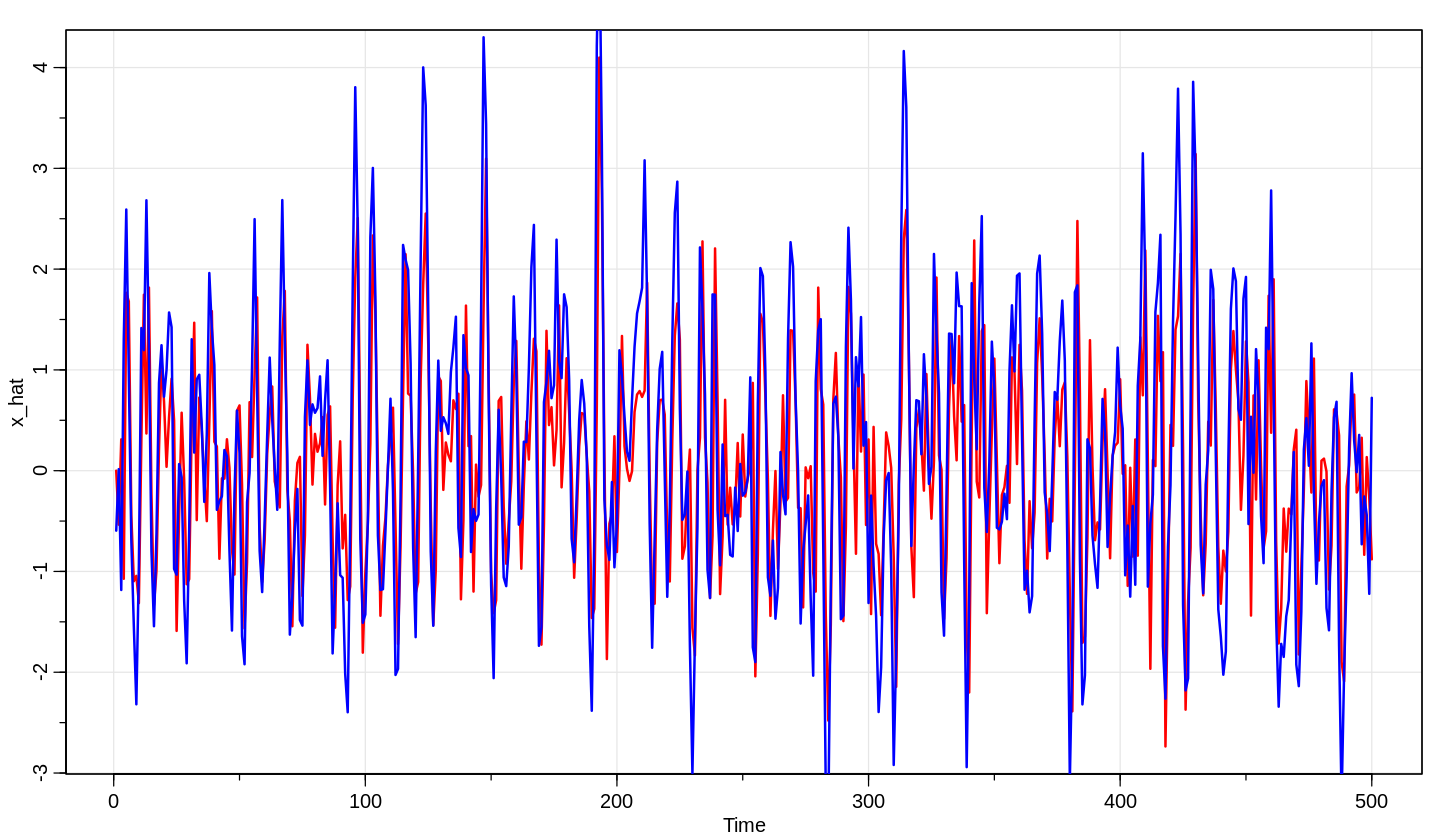

In [156]:
phi1 = 0.9
phi2 = -0.5

x_hat <- vector()
x_hat[1] = 0
x_hat[2] = phi1 * x[1]

for (i in 3:500)
{
    x_hat[i] = phi1 * x[i-1] + phi2*x[i-2]
}
x_hat=ts(x_hat)
tsplot(x_hat,col="red", lwd=2)
lines(x,col="blue", lwd=2)

In [163]:
##Residuo
residuals = x-x_hat
MSE = sd(residuals)
MSE
sd(x)

[1] 0.9448721

[1] 1.406511

## Ejercicio:

Analizar la serie `cmort` de mortalidad cardiovascular en Los Angeles y ajustar un modelo autorregresivo de orden adecuado a la misma. Predecir la mortalidad cardiovascular del año siguiente. No olvidar primero estimar la tendencia. Si quieren, pueden proponer además una componente estacional.

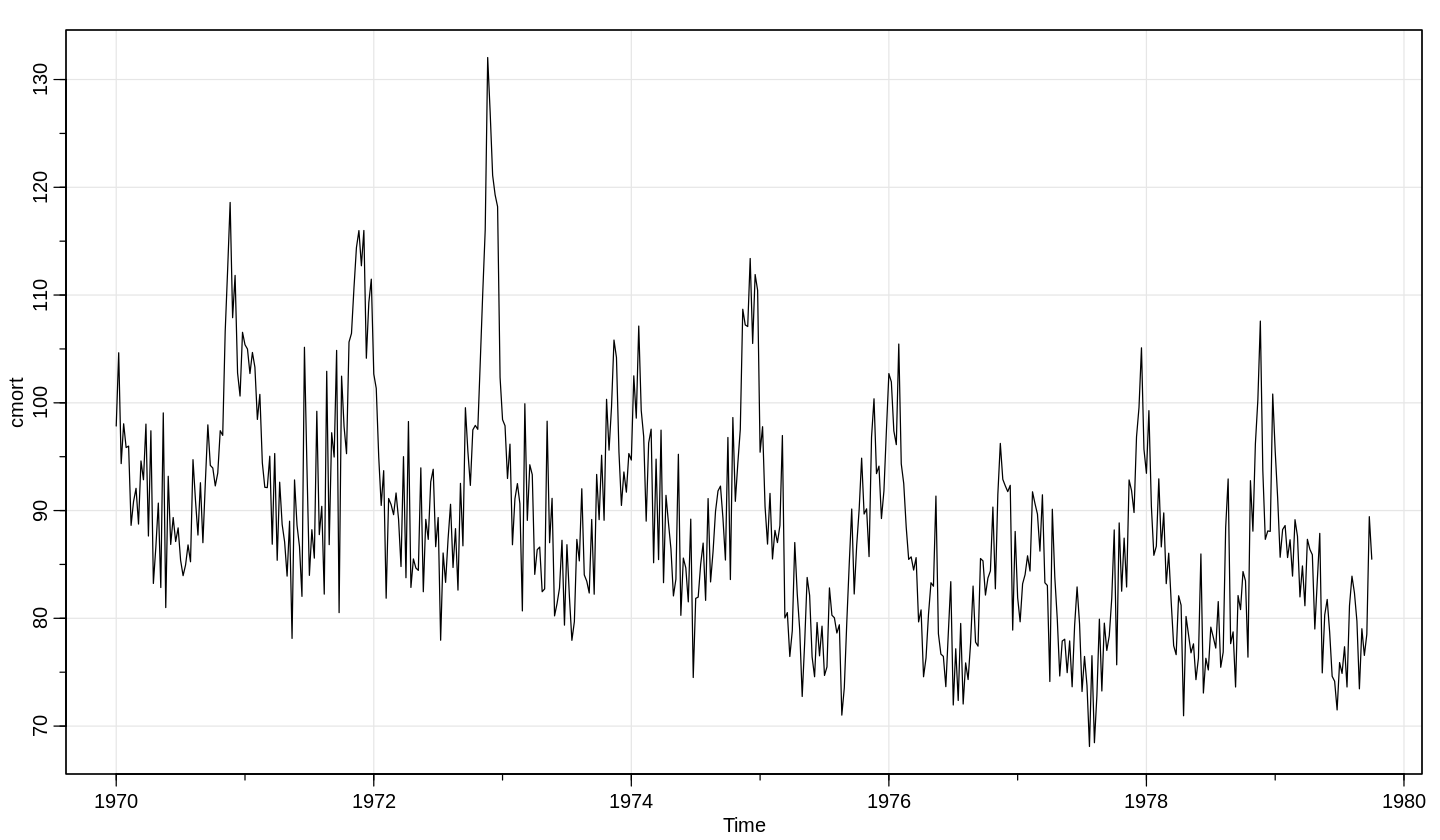

In [120]:
tsplot(cmort)